In [1]:
# scipy
#import scipy
#print('scipy: %s' % scipy.__version__)
# numpy
#import numpy
#print('numpy: %s' % numpy.__version__)
# matplotlib
#import matplotlib
#print('matplotlib: %s' % matplotlib.__version__)
# pandas
#import pandas
#print('pandas: %s' % pandas.__version__)
# statsmodels
#import statsmodels
#print('statsmodels: %s' % statsmodels.__version__)
# scikit-learn
#import sklearn
#print('sklearn: %s' % sklearn.__version__)

# Lectura de datos REDD


In [3]:
#Cargar las librerias para procesar los datos
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline
import time
from tensorflow import keras
from tensorflow.keras import layers
import scipy
import statsmodels
import sklearn

In [4]:
directory = os.getcwd()
directory

'C:\\Users\\josel\\REDD_Pruebas'

In [5]:
from datetime import datetime
ts = int("1284101485")
# if you encounter a "year is out of range" error the timestamp
# may be in milliseconds, try `ts /= 1000` in that case
print(datetime.utcfromtimestamp(ts).strftime('%Y-%m-%d %H:%M:%S'))

2010-09-10 06:51:25


In [6]:
from datetime import datetime
datetime.fromtimestamp(1172969203.1)

datetime.datetime(2007, 3, 3, 19, 46, 43, 100000)

## Analisis de datos etiquetados

- house_ {1..n} / - directorios para cada casa
  - tags.dat: etiquetas de categoría de dispositivo para cada canal
  - channel_ {1..k} .dat - lecturas de tiempo / vataje para cada canal


## 1. Analisis linea 1

In [21]:
c1h1 = pd.read_csv(directory +'\low_freq\house_1\channel_1.dat',sep=r' ',encoding='utf-8',header=None)
c1h2 = pd.read_csv(directory +'\low_freq\house_2\channel_1.dat',sep=r' ',encoding='utf-8',header=None)
c1h3 = pd.read_csv(directory +'\low_freq\house_3\channel_1.dat',sep=r' ',encoding='utf-8',header=None)
c1h4 = pd.read_csv(directory +'\low_freq\house_4\channel_1.dat',sep=r' ',encoding='utf-8',header=None)
c1h5 = pd.read_csv(directory +'\low_freq\house_5\channel_1.dat',sep=r' ',encoding='utf-8',header=None)
c1h6 = pd.read_csv(directory +'\low_freq\house_6\channel_1.dat',sep=r' ',encoding='utf-8',header=None)
n_datos1 = c1h1.shape[0]
n_datos2 = c1h2.shape[0]
n_datos3 = c1h3.shape[0]
n_datos4 = c1h4.shape[0]
n_datos5 = c1h5.shape[0]
n_datos6 = c1h6.shape[0]
print(n_datos1)
print(n_datos2)
print(n_datos3)
print(n_datos4)
print(n_datos5)
print(n_datos6)

1561660
1198534
1427284
1679839
302122
887457


In [22]:
c1h1.head()

,0,1
0,1303132929,224.19
1,1303132930,225.57
2,1303132931,226.09
3,1303132932,222.74
4,1303132933,222.20


La diferencia en la cantidad de los datos permiten inferir la frecuencia de uso de la energia en cada hogar. 

Separar los datos para graficarlos

In [23]:
x11 = c1h1[0]
y11 = c1h1[1]

x12 = c1h2[0]
y12 = c1h2[1]

x13 = c1h3[0]
y13 = c1h3[1]

x14 = c1h4[0]
y14 = c1h4[1]

x15 = c1h5[0]
y15 = c1h5[1]

x16 = c1h6[0]
y16 = c1h6[1]

In [27]:
len(x11)

1561660

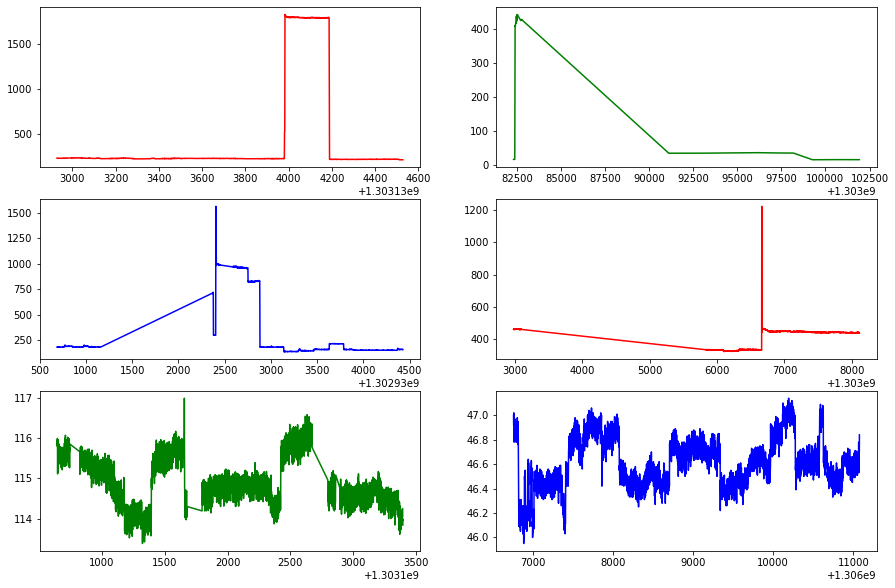

In [32]:
#Graficar los datos Tiempo UTC vs Potencia aparente
fig, ax = plt.subplots(3, 2,figsize=(15, 10))
ax[0, 0].plot(x11[:1600], y11[:1600], 'r') #row=0, col=0
#ax[0,1].plot(timec1h1[:10], y11[:10], 'r')
ax[0, 1].plot(x12[:1600], y12[:1600], 'g') #row=0, col=1
ax[1, 0].plot(x13[:1600], y13[:1600], 'b') #row=0, col=2
ax[1, 1].plot(x14[:1600], y14[:1600], 'r') #row=1, col=0
ax[2, 0].plot(x15[:1600], y15[:1600], 'g') #row=1, col=1
ax[2, 1].plot(x16[:1600], y16[:1600], 'b') #row=1, col=2
#plt.plot(x11,y11)
#plt.xlabel('T(UTC)')
#plt.ylabel('Potencia Aparente')
#plt.title('TiempoUTC vs Potencia Aparente')
#plt.show()

Las graficas muestran de manera visual la demanda de energia en el tiempo de acuerdo al historico temporal

### Estadisticas de los datos
Se verificara la estadistica de los datos para tratar de inferir su comportamiento

1. Verificaremos si tenemos datos faltantes en los conjuntos de datos
    - Se presentan el tamaño de los dato
    - El tipo de dato detectado
    - El rango de valores iniciando en 0 hasta n-1 si no hay datos vacios
    - El número de columnas
    - El indice de valores, el nombre de la columna, numero de datos llenos, # de datos nulos, el tipo de dato

In [6]:
print(c1h1.info())
print('<<<<<<<<<<<<<')
print(c1h2.info())
print('<<<<<<<<<<<<<')
print(c1h3.info())
print('<<<<<<<<<<<<<')
print(c1h4.info())
print('<<<<<<<<<<<<<')
print(c1h5.info())
print('<<<<<<<<<<<<<')
print(c1h6.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1561660 entries, 0 to 1561659
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   0       1561660 non-null  int64  
 1   1       1561660 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 23.8 MB
None
<<<<<<<<<<<<<
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1198534 entries, 0 to 1198533
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   0       1198534 non-null  int64  
 1   1       1198534 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 18.3 MB
None
<<<<<<<<<<<<<
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1427284 entries, 0 to 1427283
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   0       1427284 non-null  int64  
 1   1       1427284 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 21.8 MB
None


2. Analizaremos las estadisticas de los datos
    - Conteo de datos por columna
    - Media
    - Desviación estandar
    - Minimo
    - Cuartiles al 25, 50 y 70%
    - Maximo

In [7]:
print(c1h1.describe())
print(c1h2.describe())
print(c1h3.describe())
print(c1h4.describe())
print(c1h5.describe())
print(c1h6.describe())

                  0             1
count  1.561660e+06  1.561660e+06
mean   1.304226e+09  2.268972e+02
std    8.834430e+05  4.118770e+02
min    1.303133e+09  5.177000e+01
25%    1.303547e+09  9.159000e+01
50%    1.303938e+09  1.302200e+02
75%    1.304725e+09  2.338200e+02
max    1.306267e+09  6.081360e+03
                  0             1
count  1.198534e+06  1.198534e+06
mean   1.303732e+09  4.285075e+01
std    4.328080e+05  1.460549e+02
min    1.303082e+09  9.690000e+00
25%    1.303405e+09  1.481000e+01
50%    1.303712e+09  1.511000e+01
75%    1.304013e+09  3.355000e+01
max    1.306109e+09  1.887420e+03
                  0             1
count  1.427284e+06  1.427284e+06
mean   1.304606e+09  2.339568e+02
std    1.340521e+06  4.096002e+02
min    1.302931e+09  1.240000e+00
25%    1.303468e+09  1.108100e+02
50%    1.303874e+09  1.249400e+02
75%    1.306176e+09  1.623400e+02
max    1.306801e+09  5.083570e+03
                  0             1
count  1.679839e+06  1.679839e+06
mean   1.30466

3. Se usaran histogramas como ayuda visual para determinar la disperción de la medida de los datos y valores atipicos outliers

(array([8.21674e+05, 2.06600e+04, 1.09400e+03, 5.82000e+02, 2.07000e+02,
        3.82090e+04, 4.15100e+03, 7.23000e+02, 6.70000e+01, 2.00000e+00,
        8.00000e+00, 7.60000e+01, 2.00000e+00, 1.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([  17.9   ,  297.9005,  577.901 ,  857.9015, 1137.902 , 1417.9025,
        1697.903 , 1977.9035, 2257.904 , 2537.9045, 2817.905 , 3097.9055,
        3377.906 , 3657.9065, 3937.907 , 4217.9075, 4497.908 , 4777.9085,
        5057.909 , 5337.9095, 5617.91  ]),
 <a list of 20 Patch objects>)

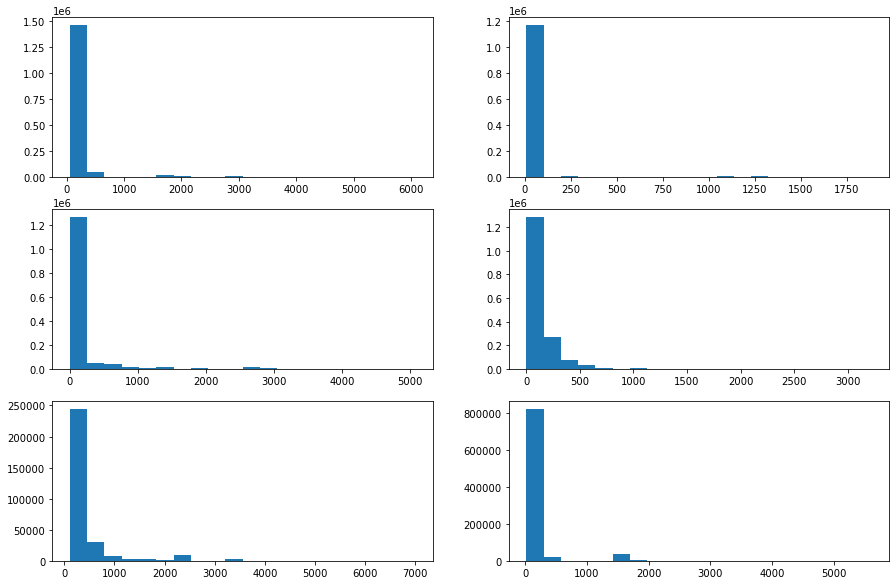

In [8]:
#Graficar los datos Tiempo UTC vs Potencia aparente
fig, ax = plt.subplots(3, 2,figsize=(15, 10))
ax[0, 0].hist(c1h1[1], bins=20) #row=0, col=0
ax[0, 1].hist(c1h2[1], bins=20) #row=0, col=1
ax[1, 0].hist(c1h3[1], bins=20) #row=0, col=2
ax[1, 1].hist(c1h4[1], bins=20) #row=1, col=0
ax[2, 0].hist(c1h5[1], bins=20) #row=1, col=1
ax[2, 1].hist(c1h6[1], bins=20) #row=1, col=2

## 2. Analisis Linea 2

In [33]:
#Canal 1 Casa 1
c2h1 = pd.read_csv(directory +'\low_freq\house_1\channel_2.dat',sep=r' ',encoding='utf-8',header=None)
c2h2 = pd.read_csv(directory +'\low_freq\house_2\channel_2.dat',sep=r' ',encoding='utf-8',header=None)
c2h3 = pd.read_csv(directory +'\low_freq\house_3\channel_2.dat',sep=r' ',encoding='utf-8',header=None)
c2h4 = pd.read_csv(directory +'\low_freq\house_4\channel_2.dat',sep=r' ',encoding='utf-8',header=None)
c2h5 = pd.read_csv(directory +'\low_freq\house_5\channel_2.dat',sep=r' ',encoding='utf-8',header=None)
c2h6 = pd.read_csv(directory +'\low_freq\house_6\channel_2.dat',sep=r' ',encoding='utf-8',header=None)
n_datos1 = c2h1.shape[0]
n_datos2 = c2h2.shape[0]
n_datos3 = c2h3.shape[0]
n_datos4 = c2h4.shape[0]
n_datos5 = c2h5.shape[0]
n_datos6 = c2h6.shape[0]
print(n_datos1)
print(n_datos2)
print(n_datos3)
print(n_datos4)
print(n_datos5)
print(n_datos6)

1561660
1198534
1427284
1679839
302122
887457


Separar los datos para graficarlos

In [34]:
x11 = c2h1[0]
y11 = c2h1[1]

x12 = c2h2[0]
y12 = c2h2[1]

x13 = c2h3[0]
y13 = c2h3[1]

x14 = c2h4[0]
y14 = c2h4[1]

x15 = c2h5[0]
y15 = c2h5[1]

x16 = c2h6[0]
y16 = c2h6[1]

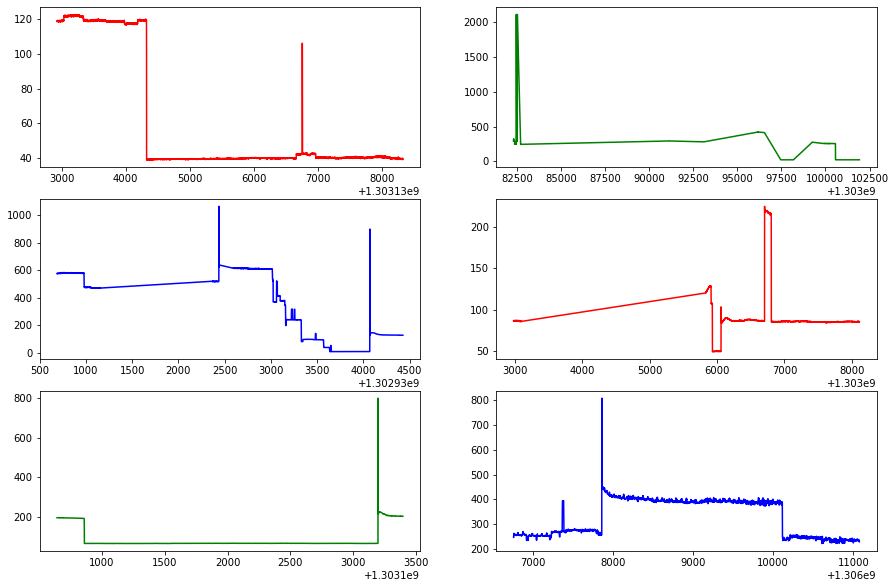

In [36]:
#Graficar los datos Tiempo UTC vs Potencia aparente
fig, ax = plt.subplots(3, 2,figsize=(15, 10))
ax[0, 0].plot(x11[:5400], y11[:5400], 'r') #row=0, col=0
ax[0, 1].plot(x12[:2400], y12[:2400], 'g') #row=0, col=1
ax[1, 0].plot(x13[:2400], y13[:2400], 'b') #row=0, col=2
ax[1, 1].plot(x14[:2400], y14[:2400], 'r') #row=1, col=0
ax[2, 0].plot(x15[:2400], y15[:2400], 'g') #row=1, col=1
ax[2, 1].plot(x16[:2400], y16[:2400], 'b') #row=1, col=2

### Estadisticas de los datos
Se verificara la estadistica de los datos para tratar de inferir su comportamiento

1. Verificaremos si tenemos datos faltantes en los conjuntos de datos

In [12]:
print(c2h1.info())
print('<<<<<<<<<<<<<')
print(c2h2.info())
print('<<<<<<<<<<<<<')
print(c2h3.info())
print('<<<<<<<<<<<<<')
print(c2h4.info())
print('<<<<<<<<<<<<<')
print(c2h5.info())
print('<<<<<<<<<<<<<')
print(c2h6.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1561660 entries, 0 to 1561659
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   0       1561660 non-null  int64  
 1   1       1561660 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 23.8 MB
None
<<<<<<<<<<<<<
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1198534 entries, 0 to 1198533
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   0       1198534 non-null  int64  
 1   1       1198534 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 18.3 MB
None
<<<<<<<<<<<<<
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1427284 entries, 0 to 1427283
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   0       1427284 non-null  int64  
 1   1       1427284 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 21.8 MB
None


2. Analizaremos las estadisticas de los datos

In [13]:
print(c2h1.describe())
print(c2h2.describe())
print(c2h3.describe())
print(c2h4.describe())
print(c2h5.describe())
print(c2h6.describe())

                  0             1
count  1.561660e+06  1.561660e+06
mean   1.304226e+09  1.570691e+02
std    8.834430e+05  4.284400e+02
min    1.303133e+09  3.663000e+01
25%    1.303547e+09  3.891000e+01
50%    1.303938e+09  4.166000e+01
75%    1.304725e+09  1.186400e+02
max    1.306267e+09  6.546540e+03
                  0             1
count  1.198534e+06  1.198534e+06
mean   1.303732e+09  1.874325e+02
std    4.328080e+05  2.152133e+02
min    1.303082e+09  2.119000e+01
25%    1.303405e+09  2.247000e+01
50%    1.303712e+09  2.184700e+02
75%    1.304013e+09  2.591300e+02
max    1.306109e+09  3.149020e+03
                  0             1
count  1.427284e+06  1.427284e+06
mean   1.304606e+09  2.120423e+02
std    1.340521e+06  3.728821e+02
min    1.302931e+09  1.500000e-01
25%    1.303468e+09  1.659000e+01
50%    1.303874e+09  1.298600e+02
75%    1.306176e+09  2.702200e+02
max    1.306801e+09  3.964520e+03
                  0             1
count  1.679839e+06  1.679839e+06
mean   1.30466

3. Se usaran histogramas como ayuda visual para determinar la disperción de la medida de los datos y valores atipicos outliers

(array([7.45636e+05, 8.35940e+04, 1.06780e+04, 1.15810e+04, 2.71040e+04,
        6.58200e+03, 1.79300e+03, 4.49000e+02, 1.80000e+01, 6.00000e+00,
        5.00000e+00, 4.00000e+00, 4.00000e+00, 1.00000e+00, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([ 137.55  ,  407.7315,  677.913 ,  948.0945, 1218.276 , 1488.4575,
        1758.639 , 2028.8205, 2299.002 , 2569.1835, 2839.365 , 3109.5465,
        3379.728 , 3649.9095, 3920.091 , 4190.2725, 4460.454 , 4730.6355,
        5000.817 , 5270.9985, 5541.18  ]),
 <a list of 20 Patch objects>)

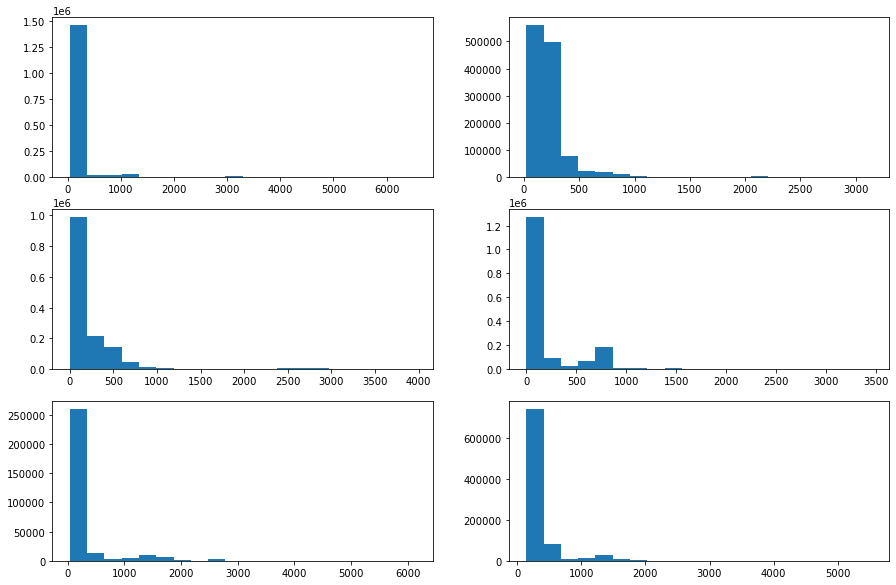

In [14]:
#Graficar los datos Tiempo UTC vs Potencia aparente
fig, ax = plt.subplots(3, 2,figsize=(15, 10))
ax[0, 0].hist(c2h1[1], bins=20) #row=0, col=0
ax[0, 1].hist(c2h2[1], bins=20) #row=0, col=1
ax[1, 0].hist(c2h3[1], bins=20) #row=0, col=2
ax[1, 1].hist(c2h4[1], bins=20) #row=1, col=0
ax[2, 0].hist(c2h5[1], bins=20) #row=1, col=1
ax[2, 1].hist(c2h6[1], bins=20) #row=1, col=2

## 3. Analisis horno 1

In [7]:
#Canal 1 Casa 1
c3h1 = pd.read_csv(directory +'\low_freq\house_1\channel_3.dat',sep=r' ',encoding='utf-8',header=None)
c3h2 = pd.read_csv(directory +'\low_freq\house_2\channel_3.dat',sep=r' ',encoding='utf-8',header=None)
c3h3 = pd.read_csv(directory +'\low_freq\house_3\channel_3.dat',sep=r' ',encoding='utf-8',header=None)
c3h4 = pd.read_csv(directory +'\low_freq\house_4\channel_3.dat',sep=r' ',encoding='utf-8',header=None)
c3h5 = pd.read_csv(directory +'\low_freq\house_5\channel_3.dat',sep=r' ',encoding='utf-8',header=None)
c3h6 = pd.read_csv(directory +'\low_freq\house_6\channel_3.dat',sep=r' ',encoding='utf-8',header=None)
n_datos1 = c3h1.shape[0]
n_datos2 = c3h2.shape[0]
n_datos3 = c3h3.shape[0]
n_datos4 = c3h4.shape[0]
n_datos5 = c3h5.shape[0]
n_datos6 = c3h6.shape[0]
print(n_datos1)
print(n_datos2)
print(n_datos3)
print(n_datos4)
print(n_datos5)
print(n_datos6)

745878
318759
404107
570363
80417
376968


Separar los datos para graficarlos

In [8]:
x11 = c3h1[0]
y11 = c3h1[1]

x12 = c3h2[0]
y12 = c3h2[1]

x13 = c3h3[0]
y13 = c3h3[1]

x14 = c3h4[0]
y14 = c3h4[1]

x15 = c3h5[0]
y15 = c3h5[1]

x16 = c3h6[0]
y16 = c3h6[1]

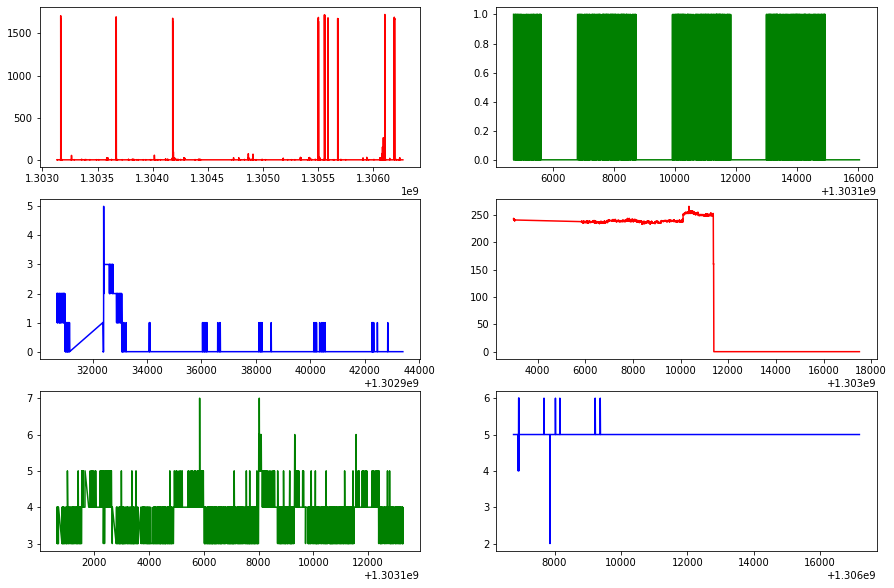

In [9]:
#Graficar los datos Tiempo UTC vs Potencia aparente
fig, ax = plt.subplots(3, 2,figsize=(15, 10))
#ax[0, 0].plot(x11[:3000], y11[:3000], 'r') #row=0, col=0
ax[0, 0].plot(x11, y11, 'r') #row=0, col=0
ax[0, 1].plot(x12[:3000], y12[:3000], 'g') #row=0, col=1
ax[1, 0].plot(x13[:3000], y13[:3000], 'b') #row=0, col=2
ax[1, 1].plot(x14[:3000], y14[:3000], 'r') #row=1, col=0
ax[2, 0].plot(x15[:3000], y15[:3000], 'g') #row=1, col=1
ax[2, 1].plot(x16[:3000], y16[:3000], 'b') #row=1, col=2

### Estadisticas de los datos
Se verificara la estadistica de los datos para tratar de inferir su comportamiento

1. Verificaremos si tenemos datos faltantes en los conjuntos de datos

In [12]:
print(c3h1.info())
print('<<<<<<<<<<<<<')
print(c3h2.info())
print('<<<<<<<<<<<<<')
print(c3h3.info())
print('<<<<<<<<<<<<<')
print(c3h4.info())
print('<<<<<<<<<<<<<')
print(c3h5.info())
print('<<<<<<<<<<<<<')
print(c3h6.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 745878 entries, 0 to 745877
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0       745878 non-null  int64  
 1   1       745878 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 11.4 MB
None
<<<<<<<<<<<<<
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318759 entries, 0 to 318758
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0       318759 non-null  int64  
 1   1       318759 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 4.9 MB
None
<<<<<<<<<<<<<
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404107 entries, 0 to 404106
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0       404107 non-null  int64  
 1   1       404107 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 6.2 MB
None
<<<<<<<<<<<<<
<class

2. Analizaremos las estadisticas de los datos

In [11]:
print(c3h1.describe())
print(c3h2.describe())
print(c3h3.describe())
print(c3h4.describe())
print(c3h5.describe())
print(c3h6.describe())

                  0              1
count  7.458780e+05  745878.000000
mean   1.304712e+09       4.792908
std    9.366811e+05      87.754236
min    1.303133e+09       0.000000
25%    1.303864e+09       0.000000
50%    1.304818e+09       0.000000
75%    1.305545e+09       0.000000
max    1.306267e+09    1725.000000
                  0              1
count  3.187590e+05  318759.000000
mean   1.303738e+09       6.181444
std    4.323965e+05      37.687006
min    1.303105e+09       0.000000
25%    1.303411e+09       0.000000
50%    1.303718e+09       0.000000
75%    1.304019e+09      13.000000
max    1.306109e+09     805.000000
                  0              1
count  4.041070e+05  404107.000000
mean   1.304646e+09       2.916487
std    1.340995e+06      24.558170
min    1.302931e+09       0.000000
25%    1.303476e+09       0.000000
50%    1.303892e+09       0.000000
75%    1.306144e+09       1.000000
max    1.306801e+09     973.000000
                  0              1
count  5.703630e+05 

3. Se usaran histogramas como ayuda visual para determinar la disperción de la medida de los datos y valores atipicos outliers

(array([3.76783e+05, 3.00000e+00, 1.00000e+00, 0.00000e+00, 3.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 5.70000e+01, 1.20000e+02]),
 array([   0.  ,   70.05,  140.1 ,  210.15,  280.2 ,  350.25,  420.3 ,
         490.35,  560.4 ,  630.45,  700.5 ,  770.55,  840.6 ,  910.65,
         980.7 , 1050.75, 1120.8 , 1190.85, 1260.9 , 1330.95, 1401.  ]),
 <a list of 20 Patch objects>)

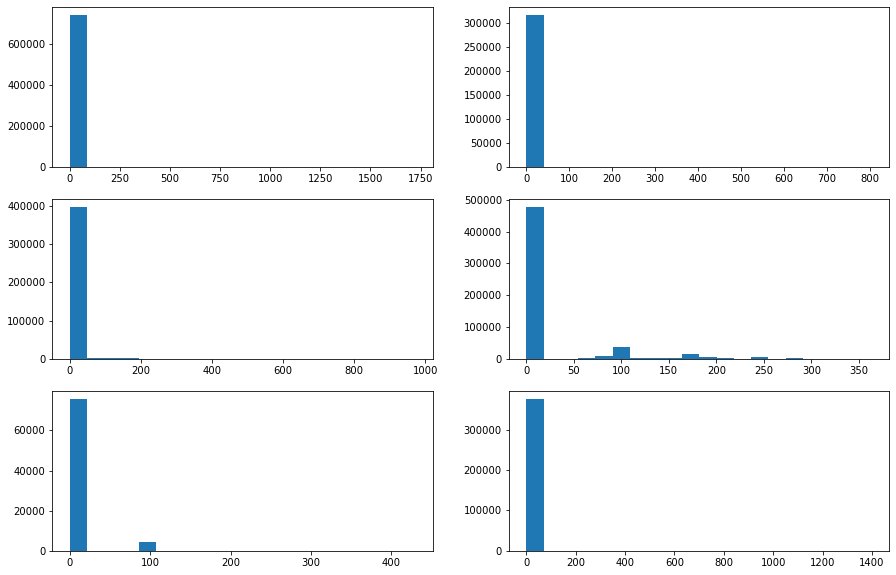

In [20]:
#Graficar los datos Tiempo UTC vs Potencia aparente
fig, ax = plt.subplots(3, 2,figsize=(15, 10))
ax[0, 0].hist(c3h1[1], bins=20) #row=0, col=0
ax[0, 1].hist(c3h2[1], bins=20) #row=0, col=1
ax[1, 0].hist(c3h3[1], bins=20) #row=0, col=2
ax[1, 1].hist(c3h4[1], bins=20) #row=1, col=0
ax[2, 0].hist(c3h5[1], bins=20) #row=1, col=1
ax[2, 1].hist(c3h6[1], bins=20) #row=1, col=2

## 4. Analisis horno 2

In [40]:
#Canal 1 Casa 1
c4h1 = pd.read_csv(directory +'\low_freq\house_1\channel_4.dat',sep=r' ',encoding='utf-8',header=None)
c4h2 = pd.read_csv(directory +'\low_freq\house_2\channel_4.dat',sep=r' ',encoding='utf-8',header=None)
c4h3 = pd.read_csv(directory +'\low_freq\house_3\channel_4.dat',sep=r' ',encoding='utf-8',header=None)
c4h4 = pd.read_csv(directory +'\low_freq\house_4\channel_4.dat',sep=r' ',encoding='utf-8',header=None)
c4h5 = pd.read_csv(directory +'\low_freq\house_5\channel_4.dat',sep=r' ',encoding='utf-8',header=None)
c4h6 = pd.read_csv(directory +'\low_freq\house_6\channel_4.dat',sep=r' ',encoding='utf-8',header=None)
n_datos1 = c4h1.shape[0]
n_datos2 = c4h2.shape[0]
n_datos3 = c4h3.shape[0]
n_datos4 = c4h4.shape[0]
n_datos5 = c4h5.shape[0]
n_datos6 = c4h6.shape[0]
print(n_datos1)
print(n_datos2)
print(n_datos3)
print(n_datos4)
print(n_datos5)
print(n_datos6)

745878
318759
404107
570363
80417
376968


Separar los datos para graficarlos

In [41]:
x11 = c4h1[0]
y11 = c4h1[1]

x12 = c4h2[0]
y12 = c4h2[1]

x13 = c4h3[0]
y13 = c4h3[1]

x14 = c4h4[0]
y14 = c4h4[1]

x15 = c4h5[0]
y15 = c4h5[1]

x16 = c4h6[0]
y16 = c4h6[1]

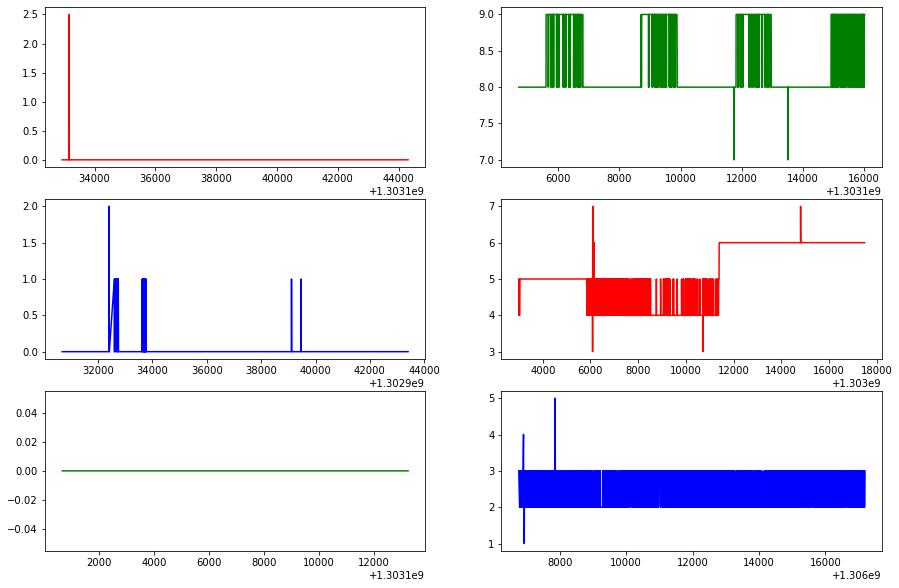

In [42]:
#Graficar los datos Tiempo UTC vs Potencia aparente
fig, ax = plt.subplots(3, 2,figsize=(15, 10))
ax[0, 0].plot(x11[:3000], y11[:3000], 'r') #row=0, col=0
ax[0, 1].plot(x12[:3000], y12[:3000], 'g') #row=0, col=1
ax[1, 0].plot(x13[:3000], y13[:3000], 'b') #row=0, col=2
ax[1, 1].plot(x14[:3000], y14[:3000], 'r') #row=1, col=0
ax[2, 0].plot(x15[:3000], y15[:3000], 'g') #row=1, col=1
ax[2, 1].plot(x16[:3000], y16[:3000], 'b') #row=1, col=2

### Estadisticas de los datos
Se verificara la estadistica de los datos para tratar de inferir su comportamiento

1. Verificaremos si tenemos datos faltantes en los conjuntos de datos

In [24]:
print(c4h1.info())
print('<<<<<<<<<<<<<')
print(c4h2.info())
print('<<<<<<<<<<<<<')
print(c4h3.info())
print('<<<<<<<<<<<<<')
print(c4h4.info())
print('<<<<<<<<<<<<<')
print(c4h5.info())
print('<<<<<<<<<<<<<')
print(c4h6.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 745878 entries, 0 to 745877
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0       745878 non-null  int64  
 1   1       745878 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 11.4 MB
None
<<<<<<<<<<<<<
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318759 entries, 0 to 318758
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0       318759 non-null  int64  
 1   1       318759 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 4.9 MB
None
<<<<<<<<<<<<<
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404107 entries, 0 to 404106
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0       404107 non-null  int64  
 1   1       404107 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 6.2 MB
None
<<<<<<<<<<<<<
<class

2. Analizaremos las estadisticas de los datos

In [25]:
print(c4h1.describe())
print(c4h2.describe())
print(c4h3.describe())
print(c4h4.describe())
print(c4h5.describe())
print(c4h6.describe())

                  0              1
count  7.458780e+05  745878.000000
mean   1.304712e+09       6.300883
std    9.366811e+05     117.280344
min    1.303133e+09       0.000000
25%    1.303864e+09       0.000000
50%    1.304818e+09       0.000000
75%    1.305545e+09       0.000000
max    1.306267e+09    2590.000000
                  0              1
count  3.187590e+05  318759.000000
mean   1.303738e+09      26.532819
std    4.323965e+05      45.844400
min    1.303105e+09       0.000000
25%    1.303411e+09       8.000000
50%    1.303718e+09       8.000000
75%    1.304019e+09       9.000000
max    1.306109e+09     289.000000
                  0              1
count  4.041070e+05  404107.000000
mean   1.304646e+09       0.099862
std    1.340995e+06       0.338630
min    1.302931e+09       0.000000
25%    1.303476e+09       0.000000
50%    1.303892e+09       0.000000
75%    1.306144e+09       0.000000
max    1.306801e+09      18.000000
                  0              1
count  5.703630e+05 

3. Se usaran histogramas como ayuda visual para determinar la disperción de la medida de los datos y valores atipicos outliers

(array([3.76876e+05, 1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 8.70000e+01]),
 array([  0. ,  18.5,  37. ,  55.5,  74. ,  92.5, 111. , 129.5, 148. ,
        166.5, 185. , 203.5, 222. , 240.5, 259. , 277.5, 296. , 314.5,
        333. , 351.5, 370. ]),
 <a list of 20 Patch objects>)

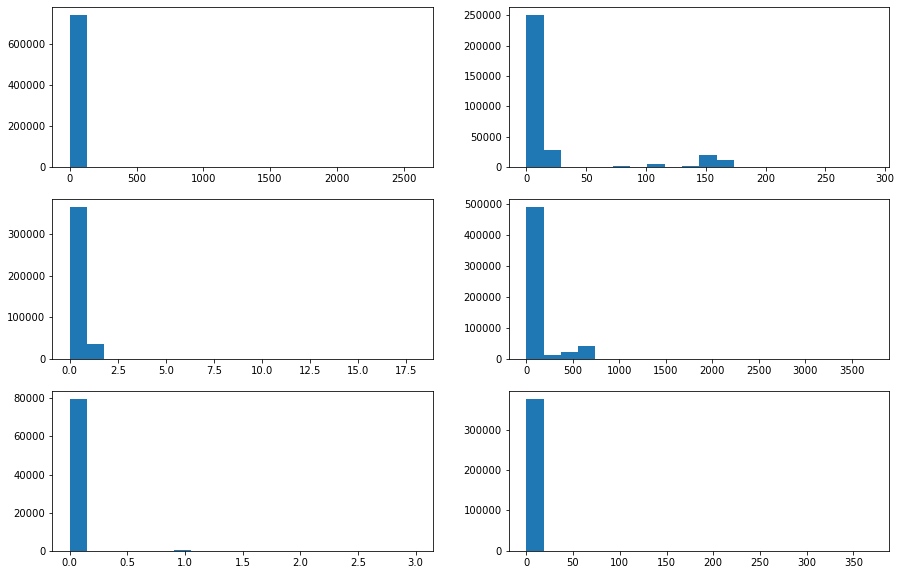

In [26]:
#Graficar los datos Tiempo UTC vs Potencia aparente
fig, ax = plt.subplots(3, 2,figsize=(15, 10))
ax[0, 0].hist(c4h1[1], bins=20) #row=0, col=0
ax[0, 1].hist(c4h2[1], bins=20) #row=0, col=1
ax[1, 0].hist(c4h3[1], bins=20) #row=0, col=2
ax[1, 1].hist(c4h4[1], bins=20) #row=1, col=0
ax[2, 0].hist(c4h5[1], bins=20) #row=1, col=1
ax[2, 1].hist(c4h6[1], bins=20) #row=1, col=2

## 5. Analisis refrigerador

In [54]:
#Canal 1 Casa 1
c5h1 = pd.read_csv(directory +'\low_freq\house_1\channel_5.dat',sep=r' ',encoding='utf-8',header=None)
c5h2 = pd.read_csv(directory +'\low_freq\house_2\channel_5.dat',sep=r' ',encoding='utf-8',header=None)
c5h3 = pd.read_csv(directory +'\low_freq\house_3\channel_5.dat',sep=r' ',encoding='utf-8',header=None)
c5h4 = pd.read_csv(directory +'\low_freq\house_4\channel_5.dat',sep=r' ',encoding='utf-8',header=None)
c5h5 = pd.read_csv(directory +'\low_freq\house_5\channel_5.dat',sep=r' ',encoding='utf-8',header=None)
c5h6 = pd.read_csv(directory +'\low_freq\house_6\channel_5.dat',sep=r' ',encoding='utf-8',header=None)
n_datos1 = c5h1.shape[0]
n_datos2 = c5h2.shape[0]
n_datos3 = c5h3.shape[0]
n_datos4 = c5h4.shape[0]
n_datos5 = c5h5.shape[0]
n_datos6 = c5h6.shape[0]
print(n_datos1)
print(n_datos2)
print(n_datos3)
print(n_datos4)
print(n_datos5)
print(n_datos6)

745878
318759
404107
570363
80417
376968


Separar los datos para graficarlos

In [55]:
x11 = c5h1[0]
y11 = c5h1[1]

x12 = c5h2[0]
y12 = c5h2[1]

x13 = c5h3[0]
y13 = c5h3[1]

x14 = c5h4[0]
y14 = c5h4[1]

x15 = c5h5[0]
y15 = c5h5[1]

x16 = c5h6[0]
y16 = c5h6[1]

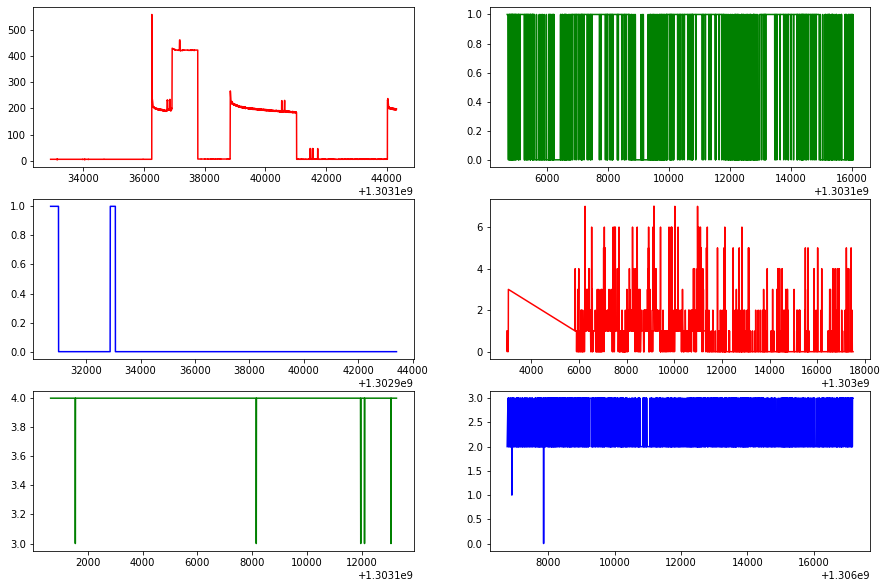

In [56]:
#Graficar los datos Tiempo UTC vs Potencia aparente
fig, ax = plt.subplots(3, 2,figsize=(15, 10))
ax[0, 0].plot(x11[:3000], y11[:3000], 'r') #row=0, col=0
ax[0, 1].plot(x12[:3000], y12[:3000], 'g') #row=0, col=1
ax[1, 0].plot(x13[:3000], y13[:3000], 'b') #row=0, col=2
ax[1, 1].plot(x14[:3000], y14[:3000], 'r') #row=1, col=0
ax[2, 0].plot(x15[:3000], y15[:3000], 'g') #row=1, col=1
ax[2, 1].plot(x16[:3000], y16[:3000], 'b') #row=1, col=2

### Estadisticas de los datos
Se verificara la estadistica de los datos para tratar de inferir su comportamiento

1. Verificaremos si tenemos datos faltantes en los conjuntos de datos

In [30]:
print(c5h1.info())
print('<<<<<<<<<<<<<')
print(c5h2.info())
print('<<<<<<<<<<<<<')
print(c5h3.info())
print('<<<<<<<<<<<<<')
print(c5h4.info())
print('<<<<<<<<<<<<<')
print(c5h5.info())
print('<<<<<<<<<<<<<')
print(c5h6.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 745878 entries, 0 to 745877
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0       745878 non-null  int64  
 1   1       745878 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 11.4 MB
None
<<<<<<<<<<<<<
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318759 entries, 0 to 318758
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0       318759 non-null  int64  
 1   1       318759 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 4.9 MB
None
<<<<<<<<<<<<<
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404107 entries, 0 to 404106
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0       404107 non-null  int64  
 1   1       404107 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 6.2 MB
None
<<<<<<<<<<<<<
<class

2. Analizaremos las estadisticas de los datos

In [31]:
print(c5h1.describe())
print(c5h2.describe())
print(c5h3.describe())
print(c5h4.describe())
print(c5h5.describe())
print(c5h6.describe())

                  0              1
count  7.458780e+05  745878.000000
mean   1.304712e+09      56.713759
std    9.366811e+05      89.733318
min    1.303133e+09       0.000000
25%    1.303864e+09       6.000000
50%    1.304818e+09       7.000000
75%    1.305545e+09     182.000000
max    1.306267e+09    2359.000000
                  0              1
count  3.187590e+05  318759.000000
mean   1.303738e+09       1.436167
std    4.323965e+05      18.932500
min    1.303105e+09       0.000000
25%    1.303411e+09       0.000000
50%    1.303718e+09       0.000000
75%    1.304019e+09       1.000000
max    1.306109e+09     457.000000
                  0              1
count  4.041070e+05  404107.000000
mean   1.304646e+09       0.790075
std    1.340995e+06      25.069959
min    1.302931e+09       0.000000
25%    1.303476e+09       0.000000
50%    1.303892e+09       0.000000
75%    1.306144e+09       0.000000
max    1.306801e+09    1156.000000
                  0              1
count  5.703630e+05 

3. Se usaran histogramas como ayuda visual para determinar la disperción de la medida de los datos y valores atipicos outliers

(array([3.76495e+05, 0.00000e+00, 5.00000e+00, 4.00000e+00, 1.00000e+00,
        1.90000e+01, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 3.72000e+02, 7.00000e+01]),
 array([   0. ,   91.5,  183. ,  274.5,  366. ,  457.5,  549. ,  640.5,
         732. ,  823.5,  915. , 1006.5, 1098. , 1189.5, 1281. , 1372.5,
        1464. , 1555.5, 1647. , 1738.5, 1830. ]),
 <a list of 20 Patch objects>)

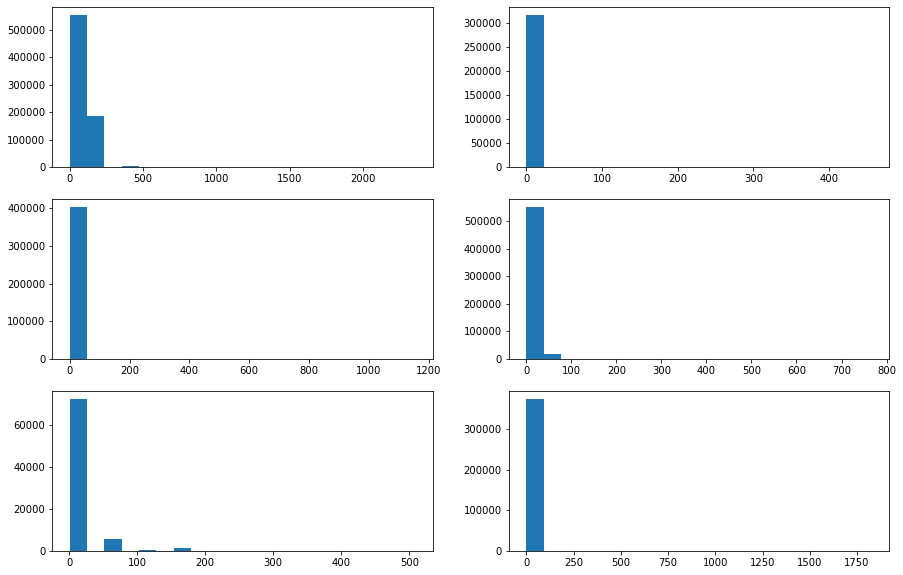

In [32]:
#Graficar los datos Tiempo UTC vs Potencia aparente
fig, ax = plt.subplots(3, 2,figsize=(15, 10))
ax[0, 0].hist(c5h1[1], bins=20) #row=0, col=0
ax[0, 1].hist(c5h2[1], bins=20) #row=0, col=1
ax[1, 0].hist(c5h3[1], bins=20) #row=0, col=2
ax[1, 1].hist(c5h4[1], bins=20) #row=1, col=0
ax[2, 0].hist(c5h5[1], bins=20) #row=1, col=1
ax[2, 1].hist(c5h6[1], bins=20) #row=1, col=2

## 6. lavavajillas

In [57]:
#Canal 1 Casa 1
c6h1 = pd.read_csv(directory +'\low_freq\house_1\channel_6.dat',sep=r' ',encoding='utf-8',header=None)
c6h2 = pd.read_csv(directory +'\low_freq\house_2\channel_6.dat',sep=r' ',encoding='utf-8',header=None)
c6h3 = pd.read_csv(directory +'\low_freq\house_3\channel_6.dat',sep=r' ',encoding='utf-8',header=None)
c6h4 = pd.read_csv(directory +'\low_freq\house_4\channel_6.dat',sep=r' ',encoding='utf-8',header=None)
c6h5 = pd.read_csv(directory +'\low_freq\house_5\channel_6.dat',sep=r' ',encoding='utf-8',header=None)
c6h6 = pd.read_csv(directory +'\low_freq\house_6\channel_6.dat',sep=r' ',encoding='utf-8',header=None)
n_datos1 = c6h1.shape[0]
n_datos2 = c6h2.shape[0]
n_datos3 = c6h3.shape[0]
n_datos4 = c6h4.shape[0]
n_datos5 = c6h5.shape[0]
n_datos6 = c6h6.shape[0]
print(n_datos1)
print(n_datos2)
print(n_datos3)
print(n_datos4)
print(n_datos5)
print(n_datos6)

745878
318759
404107
570363
80417
376968


Separar los datos para graficarlos

In [58]:
x11 = c6h1[0]
y11 = c6h1[1]

x12 = c6h2[0]
y12 = c6h2[1]

x13 = c6h3[0]
y13 = c6h3[1]

x14 = c6h4[0]
y14 = c6h4[1]

x15 = c6h5[0]
y15 = c6h5[1]

x16 = c6h6[0]
y16 = c6h6[1]

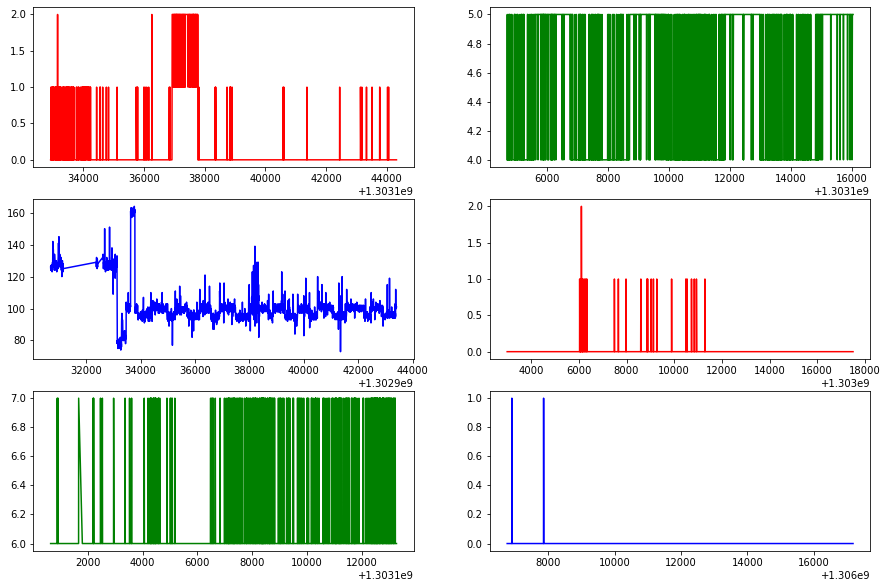

In [59]:
#Graficar los datos Tiempo UTC vs Potencia aparente
fig, ax = plt.subplots(3, 2,figsize=(15, 10))
ax[0, 0].plot(x11[:3000], y11[:3000], 'r') #row=0, col=0
ax[0, 1].plot(x12[:3000], y12[:3000], 'g') #row=0, col=1
ax[1, 0].plot(x13[:3000], y13[:3000], 'b') #row=0, col=2
ax[1, 1].plot(x14[:3000], y14[:3000], 'r') #row=1, col=0
ax[2, 0].plot(x15[:3000], y15[:3000], 'g') #row=1, col=1
ax[2, 1].plot(x16[:3000], y16[:3000], 'b') #row=1, col=2

### Estadisticas de los datos
Se verificara la estadistica de los datos para tratar de inferir su comportamiento

1. Verificaremos si tenemos datos faltantes en los conjuntos de datos

In [36]:
print(c6h1.info())
print('<<<<<<<<<<<<<')
print(c6h2.info())
print('<<<<<<<<<<<<<')
print(c6h3.info())
print('<<<<<<<<<<<<<')
print(c6h4.info())
print('<<<<<<<<<<<<<')
print(c6h5.info())
print('<<<<<<<<<<<<<')
print(c6h6.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 745878 entries, 0 to 745877
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0       745878 non-null  int64  
 1   1       745878 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 11.4 MB
None
<<<<<<<<<<<<<
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318759 entries, 0 to 318758
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0       318759 non-null  int64  
 1   1       318759 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 4.9 MB
None
<<<<<<<<<<<<<
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404107 entries, 0 to 404106
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0       404107 non-null  int64  
 1   1       404107 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 6.2 MB
None
<<<<<<<<<<<<<
<class

2. Analizaremos las estadisticas de los datos

In [37]:
print(c6h1.describe())
print(c6h2.describe())
print(c6h3.describe())
print(c6h4.describe())
print(c6h5.describe())
print(c6h6.describe())

                  0              1
count  7.458780e+05  745878.000000
mean   1.304712e+09      24.463316
std    9.366811e+05     148.541282
min    1.303133e+09       0.000000
25%    1.303864e+09       0.000000
50%    1.304818e+09       0.000000
75%    1.305545e+09       0.000000
max    1.306267e+09    1566.000000
                  0              1
count  3.187590e+05  318759.000000
mean   1.303738e+09      15.323181
std    4.323965e+05     110.621623
min    1.303105e+09       0.000000
25%    1.303411e+09       4.000000
50%    1.303718e+09       5.000000
75%    1.304019e+09       5.000000
max    1.306109e+09    1986.000000
                  0              1
count  4.041070e+05  404107.000000
mean   1.304646e+09     103.502337
std    1.340995e+06      64.418876
min    1.302931e+09      34.000000
25%    1.303476e+09      78.000000
50%    1.303892e+09      90.000000
75%    1.306144e+09     111.000000
max    1.306801e+09    1321.000000
                  0              1
count  5.703630e+05 

3. Se usaran histogramas como ayuda visual para determinar la disperción de la medida de los datos y valores atipicos outliers

(array([3.73018e+05, 5.00000e+01, 1.32000e+02, 1.14500e+03, 9.10000e+01,
        1.50000e+01, 7.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        5.70000e+01, 1.09500e+03, 0.00000e+00, 1.80000e+01, 1.33600e+03,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 4.00000e+00]),
 array([  0.  ,  48.45,  96.9 , 145.35, 193.8 , 242.25, 290.7 , 339.15,
        387.6 , 436.05, 484.5 , 532.95, 581.4 , 629.85, 678.3 , 726.75,
        775.2 , 823.65, 872.1 , 920.55, 969.  ]),
 <a list of 20 Patch objects>)

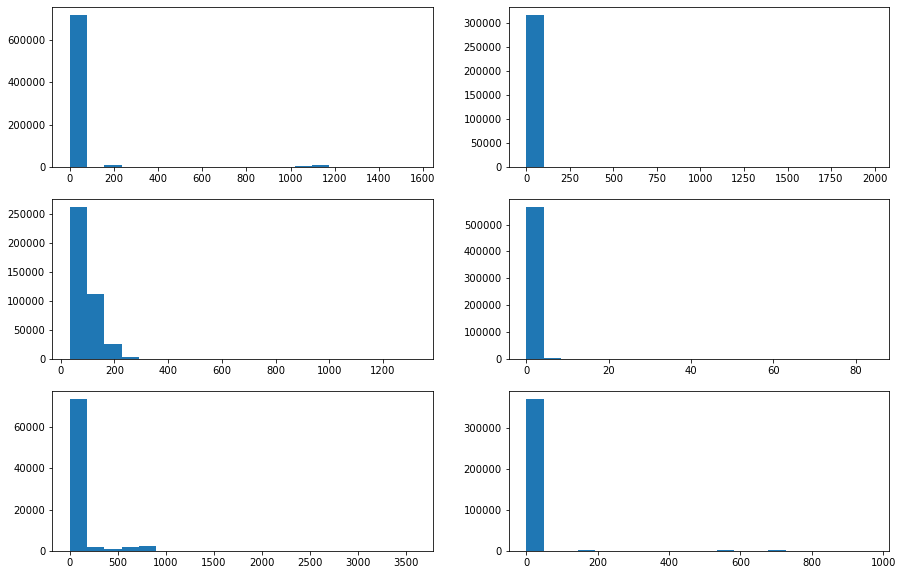

In [38]:
#Graficar los datos Tiempo UTC vs Potencia aparente
fig, ax = plt.subplots(3, 2,figsize=(15, 10))
ax[0, 0].hist(c6h1[1], bins=20) #row=0, col=0
ax[0, 1].hist(c6h2[1], bins=20) #row=0, col=1
ax[1, 0].hist(c6h3[1], bins=20) #row=0, col=2
ax[1, 1].hist(c6h4[1], bins=20) #row=1, col=0
ax[2, 0].hist(c6h5[1], bins=20) #row=1, col=1
ax[2, 1].hist(c6h6[1], bins=20) #row=1, col=2

## 7. Cocina 1

In [60]:

c7h1 = pd.read_csv(directory +'\low_freq\house_1\channel_7.dat',sep=r' ',encoding='utf-8',header=None)
c7h2 = pd.read_csv(directory +'\low_freq\house_2\channel_7.dat',sep=r' ',encoding='utf-8',header=None)
c7h3 = pd.read_csv(directory +'\low_freq\house_3\channel_7.dat',sep=r' ',encoding='utf-8',header=None)
c7h4 = pd.read_csv(directory +'\low_freq\house_4\channel_7.dat',sep=r' ',encoding='utf-8',header=None)
c7h5 = pd.read_csv(directory +'\low_freq\house_5\channel_7.dat',sep=r' ',encoding='utf-8',header=None)
c7h6 = pd.read_csv(directory +'\low_freq\house_6\channel_7.dat',sep=r' ',encoding='utf-8',header=None)
n_datos1 = c7h1.shape[0]
n_datos2 = c7h2.shape[0]
n_datos3 = c7h3.shape[0]
n_datos4 = c7h4.shape[0]
n_datos5 = c7h5.shape[0]
n_datos6 = c7h6.shape[0]
print(n_datos1)
print(n_datos2)
print(n_datos3)
print(n_datos4)
print(n_datos5)
print(n_datos6)

745878
318759
404107
570363
80417
376968


Separar los datos para graficarlos

In [61]:
x11 = c7h1[0]
y11 = c7h1[1]

x12 = c7h2[0]
y12 = c7h2[1]

x13 = c7h3[0]
y13 = c7h3[1]

x14 = c7h4[0]
y14 = c7h4[1]

x15 = c7h5[0]
y15 = c7h5[1]

x16 = c7h6[0]
y16 = c7h6[1]

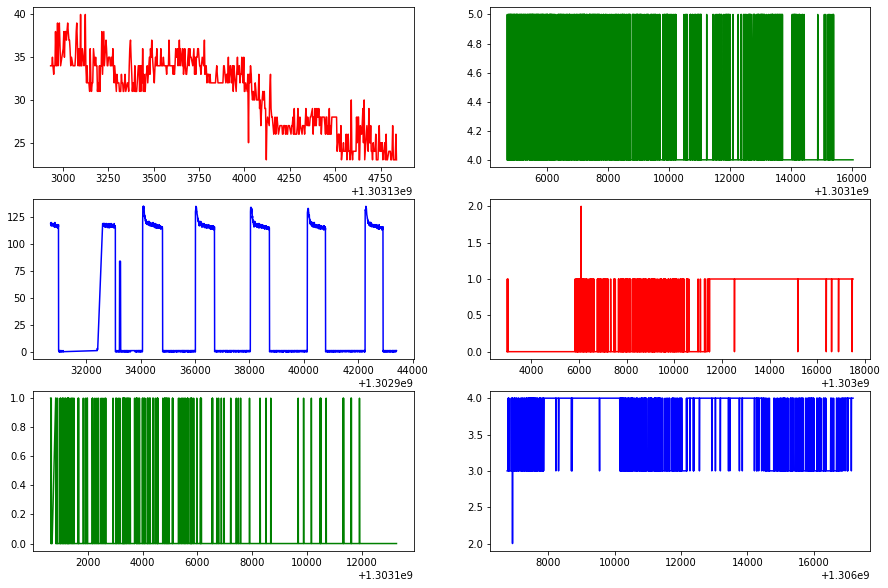

In [62]:
#Graficar los datos Tiempo UTC vs Potencia aparente
fig, ax = plt.subplots(3, 2,figsize=(15, 10))
ax[0, 0].plot(x11[:500], y11[:500], 'r') #row=0, col=0
ax[0, 1].plot(x12[:3000], y12[:3000], 'g') #row=0, col=1
ax[1, 0].plot(x13[:3000], y13[:3000], 'b') #row=0, col=2
ax[1, 1].plot(x14[:3000], y14[:3000], 'r') #row=1, col=0
ax[2, 0].plot(x15[:3000], y15[:3000], 'g') #row=1, col=1
ax[2, 1].plot(x16[:3000], y16[:3000][:3000], 'b') #row=1, col=2

### Estadisticas de los datos
Se verificara la estadistica de los datos para tratar de inferir su comportamiento

1. Verificaremos si tenemos datos faltantes en los conjuntos de datos

In [42]:
print(c7h1.info())
print('<<<<<<<<<<<<<')
print(c7h2.info())
print('<<<<<<<<<<<<<')
print(c7h3.info())
print('<<<<<<<<<<<<<')
print(c7h4.info())
print('<<<<<<<<<<<<<')
print(c7h5.info())
print('<<<<<<<<<<<<<')
print(c7h6.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 745878 entries, 0 to 745877
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0       745878 non-null  int64  
 1   1       745878 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 11.4 MB
None
<<<<<<<<<<<<<
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318759 entries, 0 to 318758
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0       318759 non-null  int64  
 1   1       318759 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 4.9 MB
None
<<<<<<<<<<<<<
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404107 entries, 0 to 404106
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0       404107 non-null  int64  
 1   1       404107 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 6.2 MB
None
<<<<<<<<<<<<<
<class

2. Analizaremos las estadisticas de los datos

In [43]:
print(c7h1.describe())
print(c7h2.describe())
print(c7h3.describe())
print(c7h4.describe())
print(c7h5.describe())
print(c7h6.describe())

                  0              1
count  7.458780e+05  745878.000000
mean   1.304712e+09      21.087790
std    9.366811e+05       1.870025
min    1.303133e+09       2.000000
25%    1.303864e+09      20.000000
50%    1.304818e+09      21.000000
75%    1.305545e+09      22.000000
max    1.306267e+09     128.000000
                  0              1
count  3.187590e+05  318759.000000
mean   1.303738e+09       2.139946
std    4.323965e+05       0.756822
min    1.303105e+09       0.000000
25%    1.303411e+09       2.000000
50%    1.303718e+09       2.000000
75%    1.304019e+09       2.000000
max    1.306109e+09      55.000000
                  0              1
count  4.041070e+05  404107.000000
mean   1.304646e+09      47.046097
std    1.340995e+06      67.685845
min    1.302931e+09       0.000000
25%    1.303476e+09       0.000000
50%    1.303892e+09       1.000000
75%    1.306144e+09     116.000000
max    1.306801e+09    1582.000000
                  0              1
count  5.703630e+05 

3. Se usaran histogramas como ayuda visual para determinar la disperción de la medida de los datos y valores atipicos outliers

(array([3.76784e+05, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.83000e+02]),
 array([  0.  ,  48.65,  97.3 , 145.95, 194.6 , 243.25, 291.9 , 340.55,
        389.2 , 437.85, 486.5 , 535.15, 583.8 , 632.45, 681.1 , 729.75,
        778.4 , 827.05, 875.7 , 924.35, 973.  ]),
 <a list of 20 Patch objects>)

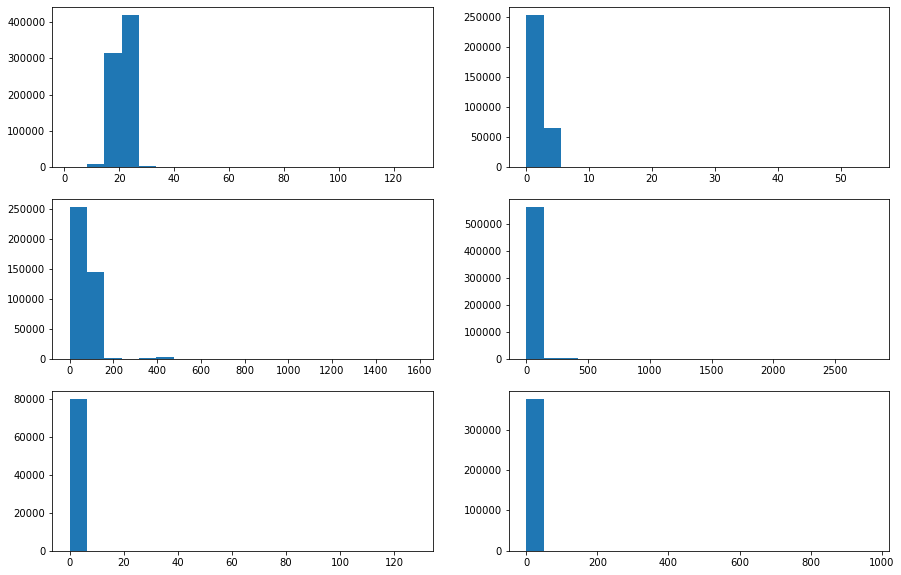

In [44]:
#Graficar los datos Tiempo UTC vs Potencia aparente
fig, ax = plt.subplots(3, 2,figsize=(15, 10))
ax[0, 0].hist(c7h1[1], bins=20) #row=0, col=0
ax[0, 1].hist(c7h2[1], bins=20) #row=0, col=1
ax[1, 0].hist(c7h3[1], bins=20) #row=0, col=2
ax[1, 1].hist(c7h4[1], bins=20) #row=1, col=0
ax[2, 0].hist(c7h5[1], bins=20) #row=1, col=1
ax[2, 1].hist(c7h6[1], bins=20) #row=1, col=2

## 8. Campana de cocina 2

In [63]:
#Canal 1 Casa 1
c8h1 = pd.read_csv(directory +'\low_freq\house_1\channel_8.dat',sep=r' ',encoding='utf-8',header=None)
c8h2 = pd.read_csv(directory +'\low_freq\house_2\channel_8.dat',sep=r' ',encoding='utf-8',header=None)
c8h3 = pd.read_csv(directory +'\low_freq\house_3\channel_8.dat',sep=r' ',encoding='utf-8',header=None)
c8h4 = pd.read_csv(directory +'\low_freq\house_4\channel_8.dat',sep=r' ',encoding='utf-8',header=None)
c8h5 = pd.read_csv(directory +'\low_freq\house_5\channel_8.dat',sep=r' ',encoding='utf-8',header=None)
c8h6 = pd.read_csv(directory +'\low_freq\house_6\channel_8.dat',sep=r' ',encoding='utf-8',header=None)
n_datos1 = c8h1.shape[0]
n_datos2 = c8h2.shape[0]
n_datos3 = c8h3.shape[0]
n_datos4 = c8h4.shape[0]
n_datos5 = c8h5.shape[0]
n_datos6 = c8h6.shape[0]
print(n_datos1)
print(n_datos2)
print(n_datos3)
print(n_datos4)
print(n_datos5)
print(n_datos6)

745878
318759
404107
570363
80417
376968


Separar los datos para graficarlos

In [64]:
x11 = c8h1[0]
y11 = c8h1[1]

x12 = c8h2[0]
y12 = c8h2[1]

x13 = c8h3[0]
y13 = c8h3[1]

x14 = c8h4[0]
y14 = c8h4[1]

x15 = c8h5[0]
y15 = c8h5[1]

x16 = c8h6[0]
y16 = c8h6[1]

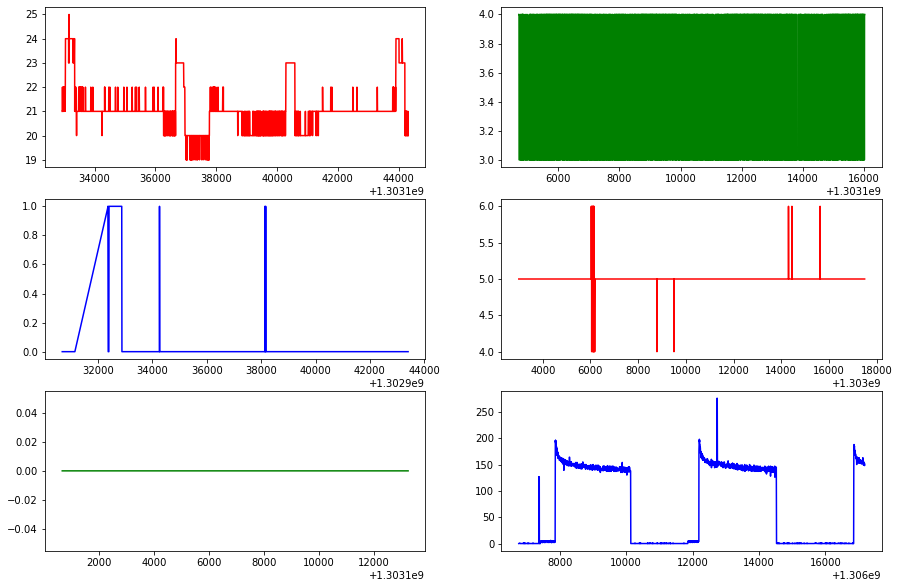

In [67]:
#Graficar los datos Tiempo UTC vs Potencia aparente
fig, ax = plt.subplots(3, 2,figsize=(15, 10))
ax[0, 0].plot(x11[:3000], y11[:3000], 'r') #row=0, col=0
ax[0, 1].plot(x12[:3000], y12[:3000], 'g') #row=0, col=1
ax[1, 0].plot(x13[:3000], y13[:3000], 'b') #row=0, col=2
ax[1, 1].plot(x14[:3000], y14[:3000], 'r') #row=1, col=0
ax[2, 0].plot(x15[:3000], y15[:3000], 'g') #row=1, col=1
ax[2, 1].plot(x16[:3000], y16[:3000], 'b') #row=1, col=2

### Estadisticas de los datos
Se verificara la estadistica de los datos para tratar de inferir su comportamiento

1. Verificaremos si tenemos datos faltantes en los conjuntos de datos

In [48]:
print(c8h1.info())
print('<<<<<<<<<<<<<')
print(c8h2.info())
print('<<<<<<<<<<<<<')
print(c8h3.info())
print('<<<<<<<<<<<<<')
print(c8h4.info())
print('<<<<<<<<<<<<<')
print(c8h5.info())
print('<<<<<<<<<<<<<')
print(c8h6.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 745878 entries, 0 to 745877
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0       745878 non-null  int64  
 1   1       745878 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 11.4 MB
None
<<<<<<<<<<<<<
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318759 entries, 0 to 318758
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0       318759 non-null  int64  
 1   1       318759 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 4.9 MB
None
<<<<<<<<<<<<<
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404107 entries, 0 to 404106
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0       404107 non-null  int64  
 1   1       404107 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 6.2 MB
None
<<<<<<<<<<<<<
<class

2. Analizaremos las estadisticas de los datos

In [49]:
print(c8h1.describe())
print(c8h2.describe())
print(c8h3.describe())
print(c8h4.describe())
print(c8h5.describe())
print(c8h6.describe())

                  0              1
count  7.458780e+05  745878.000000
mean   1.304712e+09      28.816950
std    9.366811e+05      17.572317
min    1.303133e+09       3.000000
25%    1.303864e+09      21.000000
50%    1.304818e+09      22.000000
75%    1.305545e+09      24.000000
max    1.306267e+09    1550.000000
                  0              1
count  3.187590e+05  318759.000000
mean   1.303738e+09      10.270480
std    4.323965e+05      97.377658
min    1.303105e+09       0.000000
25%    1.303411e+09       1.000000
50%    1.303718e+09       1.000000
75%    1.304019e+09       1.000000
max    1.306109e+09    1119.000000
                  0              1
count  4.041070e+05  404107.000000
mean   1.304646e+09       0.085863
std    1.340995e+06       2.693782
min    1.302931e+09       0.000000
25%    1.303476e+09       0.000000
50%    1.303892e+09       0.000000
75%    1.306144e+09       0.000000
max    1.306801e+09     571.000000
                  0              1
count  5.703630e+05 

3. Se usaran histogramas como ayuda visual para determinar la disperción de la medida de los datos y valores atipicos outliers

(array([1.83568e+05, 1.91802e+05, 3.52000e+02, 1.18900e+03, 2.80000e+01,
        1.00000e+00, 0.00000e+00, 1.00000e+00, 1.00000e+00, 1.00000e+00,
        2.00000e+00, 8.00000e+00, 2.00000e+00, 0.00000e+00, 1.00000e+00,
        2.00000e+00, 4.00000e+00, 3.00000e+00, 0.00000e+00, 3.00000e+00]),
 array([   0. ,  116.8,  233.6,  350.4,  467.2,  584. ,  700.8,  817.6,
         934.4, 1051.2, 1168. , 1284.8, 1401.6, 1518.4, 1635.2, 1752. ,
        1868.8, 1985.6, 2102.4, 2219.2, 2336. ]),
 <a list of 20 Patch objects>)

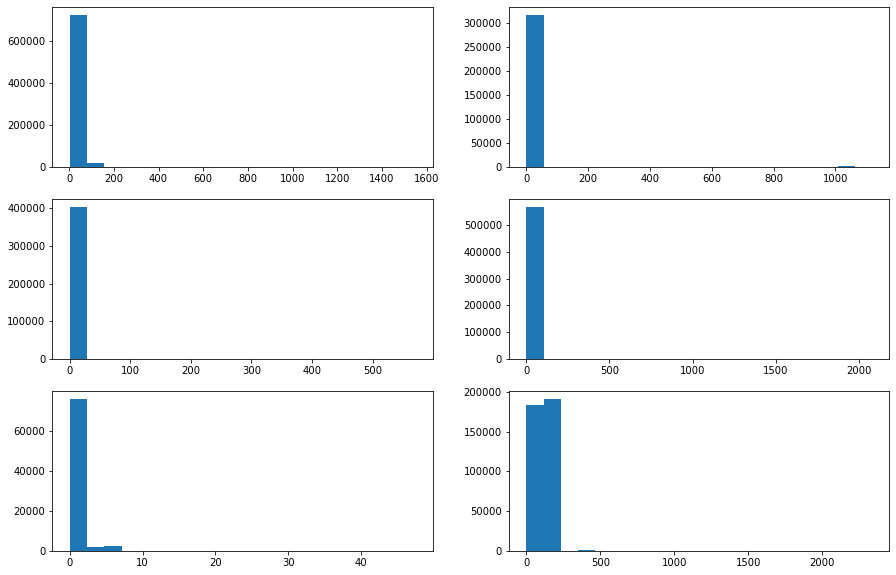

In [50]:
#Graficar los datos Tiempo UTC vs Potencia aparente
fig, ax = plt.subplots(3, 2,figsize=(15, 10))
ax[0, 0].hist(c8h1[1], bins=20) #row=0, col=0
ax[0, 1].hist(c8h2[1], bins=20) #row=0, col=1
ax[1, 0].hist(c8h3[1], bins=20) #row=0, col=2
ax[1, 1].hist(c8h4[1], bins=20) #row=1, col=0
ax[2, 0].hist(c8h5[1], bins=20) #row=1, col=1
ax[2, 1].hist(c8h6[1], bins=20) #row=1, col=2

## 9. Iluminación

In [68]:
c9h1 = pd.read_csv(directory +'\low_freq\house_1\channel_9.dat',sep=r' ',encoding='utf-8',header=None)
c9h2 = pd.read_csv(directory +'\low_freq\house_2\channel_9.dat',sep=r' ',encoding='utf-8',header=None)
c9h3 = pd.read_csv(directory +'\low_freq\house_3\channel_9.dat',sep=r' ',encoding='utf-8',header=None)
c9h4 = pd.read_csv(directory +'\low_freq\house_4\channel_9.dat',sep=r' ',encoding='utf-8',header=None)
c9h5 = pd.read_csv(directory +'\low_freq\house_5\channel_9.dat',sep=r' ',encoding='utf-8',header=None)
c9h6 = pd.read_csv(directory +'\low_freq\house_6\channel_9.dat',sep=r' ',encoding='utf-8',header=None)
n_datos1 = c9h1.shape[0]
n_datos2 = c9h2.shape[0]
n_datos3 = c9h3.shape[0]
n_datos4 = c9h4.shape[0]
n_datos5 = c9h5.shape[0]
n_datos6 = c9h6.shape[0]
print(n_datos1)
print(n_datos2)
print(n_datos3)
print(n_datos4)
print(n_datos5)
print(n_datos6)

745878
318759
404107
570363
80417
376968


Separar los datos para graficarlos

In [69]:
x11 = c9h1[0]
y11 = c9h1[1]

x12 = c9h2[0]
y12 = c9h2[1]

x13 = c9h3[0]
y13 = c9h3[1]

x14 = c9h4[0]
y14 = c9h4[1]

x15 = c9h5[0]
y15 = c9h5[1]

x16 = c9h6[0]
y16 = c9h6[1]

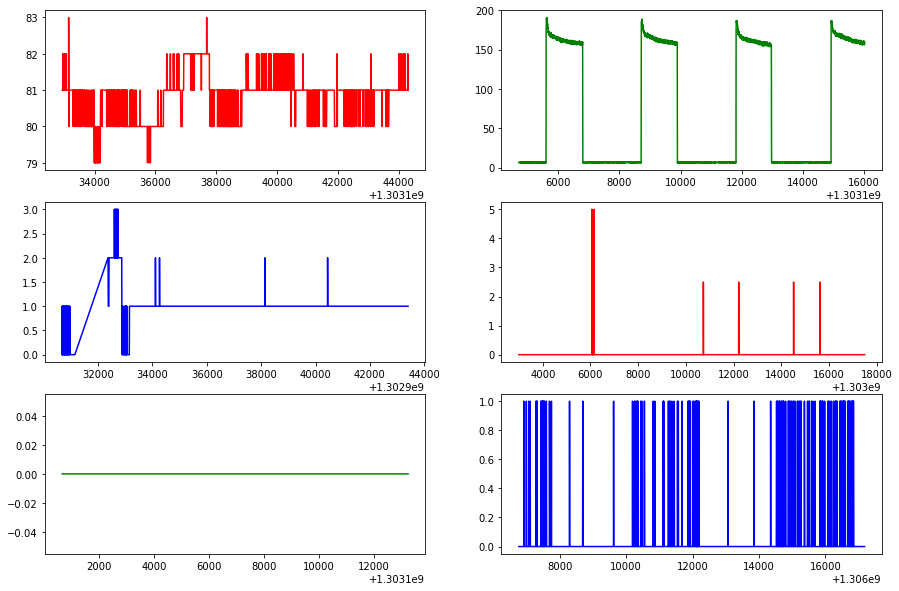

In [70]:
#Graficar los datos Tiempo UTC vs Potencia aparente
fig, ax = plt.subplots(3, 2,figsize=(15, 10))
ax[0, 0].plot(x11[:3000], y11[:3000], 'r') #row=0, col=0
ax[0, 1].plot(x12[:3000], y12[:3000], 'g') #row=0, col=1
ax[1, 0].plot(x13[:3000], y13[:3000], 'b') #row=0, col=2
ax[1, 1].plot(x14[:3000], y14[:3000], 'r') #row=1, col=0
ax[2, 0].plot(x15[:3000], y15[:3000], 'g') #row=1, col=1
ax[2, 1].plot(x16[:3000], y16[:3000], 'b') #row=1, col=2

### Estadisticas de los datos
Se verificara la estadistica de los datos para tratar de inferir su comportamiento

1. Verificaremos si tenemos datos faltantes en los conjuntos de datos

In [54]:
print(c9h1.info())
print('<<<<<<<<<<<<<')
print(c9h2.info())
print('<<<<<<<<<<<<')
print(c9h3.info())
print('<<<<<<<<<<<<<')
print(c9h4.info())
print('<<<<<<<<<<<<<')
print(c9h5.info())
print('<<<<<<<<<<<<<')
print(c9h6.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 745878 entries, 0 to 745877
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0       745878 non-null  int64  
 1   1       745878 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 11.4 MB
None
<<<<<<<<<<<<<
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318759 entries, 0 to 318758
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0       318759 non-null  int64  
 1   1       318759 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 4.9 MB
None
<<<<<<<<<<<<
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404107 entries, 0 to 404106
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0       404107 non-null  int64  
 1   1       404107 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 6.2 MB
None
<<<<<<<<<<<<<
<class 

2. Analizaremos las estadisticas de los datos

In [55]:
print(c9h1.describe())
print(c9h2.describe())
print(c9h3.describe())
print(c9h4.describe())
print(c9h5.describe())
print(c9h6.describe())

                  0              1
count  7.458780e+05  745878.000000
mean   1.304712e+09      38.956945
std    9.366811e+05      47.976489
min    1.303133e+09       0.000000
25%    1.303864e+09       2.000000
50%    1.304818e+09      40.000000
75%    1.305545e+09      80.000000
max    1.306267e+09     363.000000
                  0              1
count  3.187590e+05  318759.000000
mean   1.303738e+09      79.676276
std    4.323965e+05      88.042026
min    1.303105e+09       0.000000
25%    1.303411e+09       6.000000
50%    1.303718e+09       7.000000
75%    1.304019e+09     161.000000
max    1.306109e+09    2246.000000
                  0              1
count  4.041070e+05  404107.000000
mean   1.304646e+09       7.041180
std    1.340995e+06      64.224908
min    1.302931e+09       0.000000
25%    1.303476e+09       1.000000
50%    1.303892e+09       1.000000
75%    1.306144e+09       1.000000
max    1.306801e+09     786.000000
                  0              1
count  5.703630e+05 

3. Se usaran histogramas como ayuda visual para determinar la disperción de la medida de los datos y valores atipicos outliers

(array([3.76837e+05, 1.40000e+01, 3.00000e+00, 1.00000e+00, 1.08000e+02,
        1.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 2.00000e+00]),
 array([  0. ,   5.6,  11.2,  16.8,  22.4,  28. ,  33.6,  39.2,  44.8,
         50.4,  56. ,  61.6,  67.2,  72.8,  78.4,  84. ,  89.6,  95.2,
        100.8, 106.4, 112. ]),
 <a list of 20 Patch objects>)

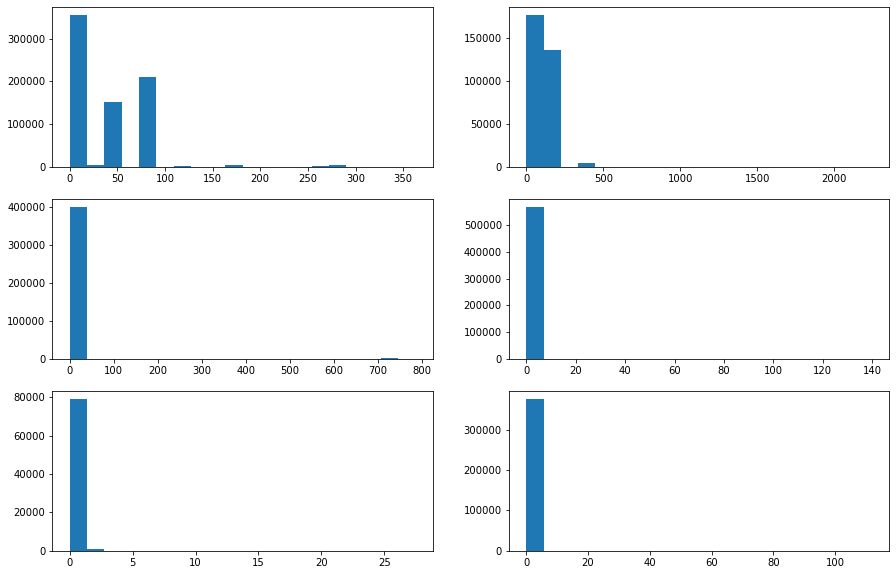

In [56]:
#Graficar los datos Tiempo UTC vs Potencia aparente
fig, ax = plt.subplots(3, 2,figsize=(15, 10))
ax[0, 0].hist(c9h1[1], bins=20) #row=0, col=0
ax[0, 1].hist(c9h2[1], bins=20) #row=0, col=1
ax[1, 0].hist(c9h3[1], bins=20) #row=0, col=2
ax[1, 1].hist(c9h4[1], bins=20) #row=1, col=0
ax[2, 0].hist(c9h5[1], bins=20) #row=1, col=1
ax[2, 1].hist(c9h6[1], bins=20) #row=1, col=2

## 10. lavadora secadora 1

In [71]:
c10h1 = pd.read_csv(directory +'\low_freq\house_1\channel_10.dat',sep=r' ',encoding='utf-8',header=None)
c10h2 = pd.read_csv(directory +'\low_freq\house_2\channel_10.dat',sep=r' ',encoding='utf-8',header=None)
c10h3 = pd.read_csv(directory +'\low_freq\house_3\channel_10.dat',sep=r' ',encoding='utf-8',header=None)
c10h4 = pd.read_csv(directory +'\low_freq\house_4\channel_10.dat',sep=r' ',encoding='utf-8',header=None)
c10h5 = pd.read_csv(directory +'\low_freq\house_5\channel_10.dat',sep=r' ',encoding='utf-8',header=None)
c10h6 = pd.read_csv(directory +'\low_freq\house_6\channel_10.dat',sep=r' ',encoding='utf-8',header=None)
n_datos1 = c10h1.shape[0]
n_datos2 = c10h2.shape[0]
n_datos3 = c10h3.shape[0]
n_datos4 = c10h4.shape[0]
n_datos5 = c10h5.shape[0]
n_datos6 = c10h6.shape[0]
print(n_datos1)
print(n_datos2)
print(n_datos3)
print(n_datos4)
print(n_datos5)
print(n_datos6)

745878
318759
404107
570363
80417
376968


Separar los datos para graficarlos

In [72]:
x11 = c10h1[0]
y11 = c10h1[1]

x12 = c10h2[0]
y12 = c10h2[1]

x13 = c10h3[0]
y13 = c10h3[1]

x14 = c10h4[0]
y14 = c10h4[1]

x15 = c10h5[0]
y15 = c10h5[1]

x16 = c10h6[0]
y16 = c10h6[1]

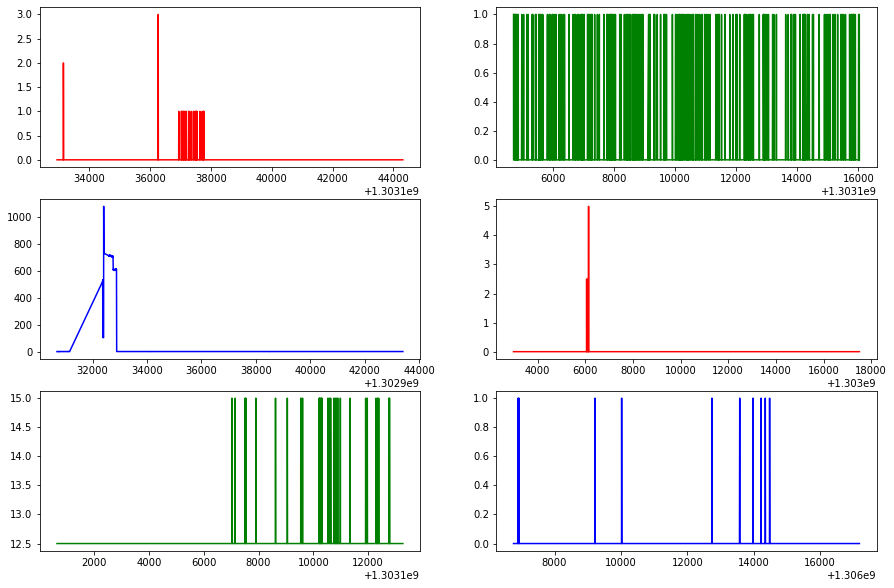

In [73]:
#Graficar los datos Tiempo UTC vs Potencia aparente
fig, ax = plt.subplots(3, 2,figsize=(15, 10))
ax[0, 0].plot(x11[:3000], y11[:3000], 'r') #row=0, col=0
ax[0, 1].plot(x12[:3000], y12[:3000], 'g') #row=0, col=1
ax[1, 0].plot(x13[:3000], y13[:3000], 'b') #row=0, col=2
ax[1, 1].plot(x14[:3000], y14[:3000], 'r') #row=1, col=0
ax[2, 0].plot(x15[:3000], y15[:3000], 'g') #row=1, col=1
ax[2, 1].plot(x16[:3000], y16[:3000], 'b') #row=1, col=2

### Estadisticas de los datos
Se verificara la estadistica de los datos para tratar de inferir su comportamiento

1. Verificaremos si tenemos datos faltantes en los conjuntos de datos

In [60]:
print(c10h1.info())
print('<<<<<<<<<<<<<')
print(c10h2.info())
print('<<<<<<<<<<<<<')
print(c10h3.info())
print('<<<<<<<<<<<<<')
print(c10h4.info())
print('<<<<<<<<<<<<<')
print(c10h5.info())
print('<<<<<<<<<<<<<')
print(c10h6.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 745878 entries, 0 to 745877
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0       745878 non-null  int64  
 1   1       745878 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 11.4 MB
None
<<<<<<<<<<<<<
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318759 entries, 0 to 318758
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0       318759 non-null  int64  
 1   1       318759 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 4.9 MB
None
<<<<<<<<<<<<<
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404107 entries, 0 to 404106
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0       404107 non-null  int64  
 1   1       404107 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 6.2 MB
None
<<<<<<<<<<<<<
<class

2. Analizaremos las estadisticas de los datos

In [61]:
print(c10h1.describe())
print(c10h2.describe())
print(c10h3.describe())
print(c10h4.describe())
print(c10h5.describe())
print(c10h6.describe())

                  0              1
count  7.458780e+05  745878.000000
mean   1.304712e+09       4.302677
std    9.366811e+05      44.783941
min    1.303133e+09       0.000000
25%    1.303864e+09       0.000000
50%    1.304818e+09       0.000000
75%    1.305545e+09       0.000000
max    1.306267e+09    4662.000000
                  0              1
count  3.187590e+05  318759.000000
mean   1.303738e+09       8.919974
std    4.323965e+05      95.688486
min    1.303105e+09       0.000000
25%    1.303411e+09       0.000000
50%    1.303718e+09       0.000000
75%    1.304019e+09       0.000000
max    1.306109e+09    1457.000000
                  0              1
count  4.041070e+05  404107.000000
mean   1.304646e+09      14.825197
std    1.340995e+06      80.648507
min    1.302931e+09       0.000000
25%    1.303476e+09       5.000000
50%    1.303892e+09       5.000000
75%    1.306144e+09       5.000000
max    1.306801e+09    1194.000000
                  0              1
count  5.703630e+05 

3. Se usaran histogramas como ayuda visual para determinar la disperción de la medida de los datos y valores atipicos outliers

(array([2.93776e+05, 1.30000e+01, 3.88400e+03, 3.38120e+04, 1.28200e+03,
        7.01000e+02, 2.41590e+04, 1.17370e+04, 7.48300e+03, 1.20000e+02,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([  0.,  14.,  28.,  42.,  56.,  70.,  84.,  98., 112., 126., 140.,
        154., 168., 182., 196., 210., 224., 238., 252., 266., 280.]),
 <a list of 20 Patch objects>)

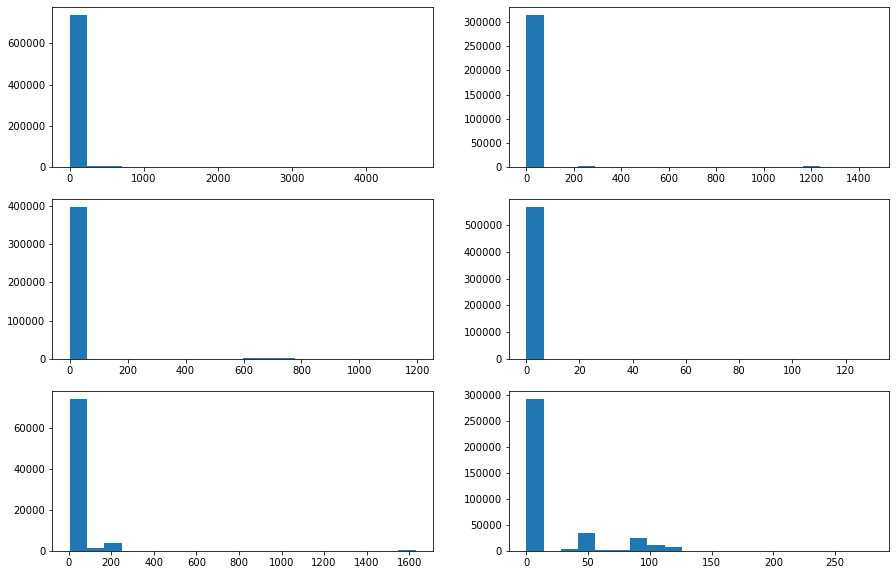

In [62]:
#Graficar los datos Tiempo UTC vs Potencia aparente
fig, ax = plt.subplots(3, 2,figsize=(15, 10))
ax[0, 0].hist(c10h1[1], bins=20) #row=0, col=0
ax[0, 1].hist(c10h2[1], bins=20) #row=0, col=1
ax[1, 0].hist(c10h3[1], bins=20) #row=0, col=2
ax[1, 1].hist(c10h4[1], bins=20) #row=1, col=0
ax[2, 0].hist(c10h5[1], bins=20) #row=1, col=1
ax[2, 1].hist(c10h6[1], bins=20) #row=1, col=2

## 11. Microondas

In [74]:
c11h1 = pd.read_csv(directory +'\low_freq\house_1\channel_11.dat',sep=r' ',encoding='utf-8',header=None)
c11h2 = pd.read_csv(directory +'\low_freq\house_2\channel_11.dat',sep=r' ',encoding='utf-8',header=None)
c11h3 = pd.read_csv(directory +'\low_freq\house_3\channel_11.dat',sep=r' ',encoding='utf-8',header=None)
c11h4 = pd.read_csv(directory +'\low_freq\house_4\channel_11.dat',sep=r' ',encoding='utf-8',header=None)
c11h5 = pd.read_csv(directory +'\low_freq\house_5\channel_11.dat',sep=r' ',encoding='utf-8',header=None)
c11h6 = pd.read_csv(directory +'\low_freq\house_6\channel_11.dat',sep=r' ',encoding='utf-8',header=None)
n_datos1 = c11h1.shape[0]
n_datos2 = c11h2.shape[0]
n_datos3 = c11h3.shape[0]
n_datos4 = c11h4.shape[0]
n_datos5 = c11h5.shape[0]
n_datos6 = c11h6.shape[0]
print(n_datos1)
print(n_datos2)
print(n_datos3)
print(n_datos4)
print(n_datos5)
print(n_datos6)

745878
318759
404107
570363
80417
376968


Separar los datos para graficarlos

In [75]:
x11 = c11h1[0]
y11 = c11h1[1]

x12 = c11h2[0]
y12 = c11h2[1]

x13 = c11h3[0]
y13 = c11h3[1]

x14 = c11h4[0]
y14 = c11h4[1]

x15 = c11h5[0]
y15 = c11h5[1]

x16 = c11h6[0]
y16 = c11h6[1]

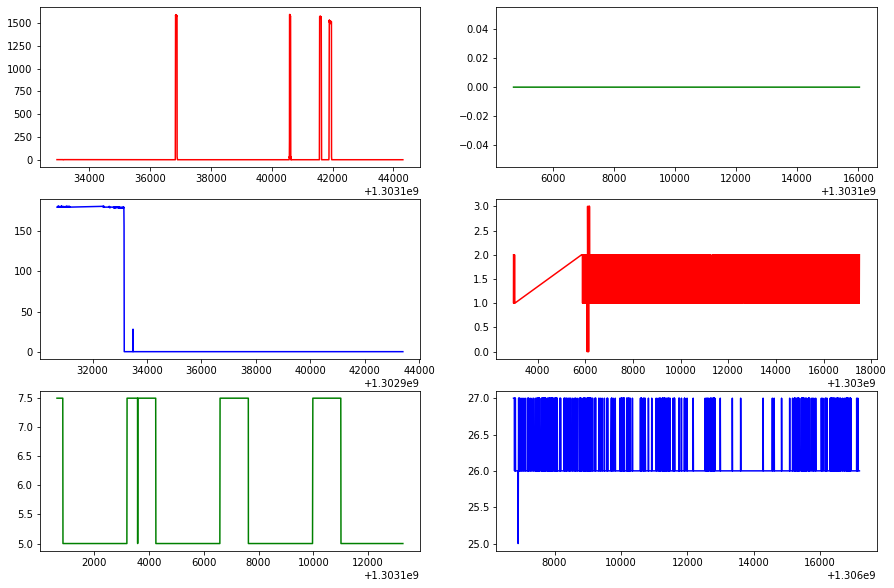

In [76]:
#Graficar los datos Tiempo UTC vs Potencia aparente
fig, ax = plt.subplots(3, 2,figsize=(15, 10))
ax[0, 0].plot(x11[:3000], y11[:3000], 'r') #row=0, col=0
ax[0, 1].plot(x12[:3000], y12[:3000], 'g') #row=0, col=1
ax[1, 0].plot(x13[:3000], y13[:3000], 'b') #row=0, col=2
ax[1, 1].plot(x14[:3000], y14[:3000], 'r') #row=1, col=0
ax[2, 0].plot(x15[:3000], y15[:3000], 'g') #row=1, col=1
ax[2, 1].plot(x16[:3000], y16[:3000], 'b') #row=1, col=2

### Estadisticas de los datos
Se verificara la estadistica de los datos para tratar de inferir su comportamiento

1. Verificaremos si tenemos datos faltantes en los conjuntos de datos

In [66]:
print(c11h1.info())
print('<<<<<<<<<<<<<')
print(c11h2.info())
print('<<<<<<<<<<<<<')
print(c11h3.info())
print('<<<<<<<<<<<<<')
print(c11h4.info())
print('<<<<<<<<<<<<<')
print(c11h5.info())
print('<<<<<<<<<<<<<')
print(c11h6.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 745878 entries, 0 to 745877
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0       745878 non-null  int64  
 1   1       745878 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 11.4 MB
None
<<<<<<<<<<<<<
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318759 entries, 0 to 318758
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0       318759 non-null  int64  
 1   1       318759 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 4.9 MB
None
<<<<<<<<<<<<<
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404107 entries, 0 to 404106
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0       404107 non-null  int64  
 1   1       404107 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 6.2 MB
None
<<<<<<<<<<<<<
<class

2. Analizaremos las estadisticas de los datos

In [67]:
print(c11h1.describe())
print(c11h2.describe())
print(c11h3.describe())
print(c11h4.describe())
print(c11h5.describe())
print(c11h6.describe())

                  0              1
count  7.458780e+05  745878.000000
mean   1.304712e+09      21.022169
std    9.366811e+05     158.595644
min    1.303133e+09       0.000000
25%    1.303864e+09       4.000000
50%    1.304818e+09       4.000000
75%    1.305545e+09       4.000000
max    1.306267e+09    2906.000000
                  0              1
count  3.187590e+05  318759.000000
mean   1.303738e+09       0.081435
std    4.323965e+05       3.300813
min    1.303105e+09       0.000000
25%    1.303411e+09       0.000000
50%    1.303718e+09       0.000000
75%    1.304019e+09       0.000000
max    1.306109e+09     609.000000
                  0              1
count  4.041070e+05  404107.000000
mean   1.304646e+09      40.443187
std    1.340995e+06      84.754964
min    1.302931e+09       0.000000
25%    1.303476e+09       0.000000
50%    1.303892e+09       0.000000
75%    1.306144e+09      22.000000
max    1.306801e+09     369.000000
                  0              1
count  5.703630e+05 

3. Se usaran histogramas como ayuda visual para determinar la disperción de la medida de los datos y valores atipicos outliers

(array([3.09061e+05, 2.20860e+04, 1.48500e+03, 4.83000e+02, 1.23000e+02,
        1.60000e+01, 1.47650e+04, 7.93000e+02, 1.62870e+04, 1.72300e+03,
        2.86300e+03, 1.42000e+03, 4.55600e+03, 7.53000e+02, 2.00000e+00,
        1.00000e+00, 4.05000e+02, 1.00000e+00, 0.00000e+00, 1.45000e+02]),
 array([  0.  ,  23.45,  46.9 ,  70.35,  93.8 , 117.25, 140.7 , 164.15,
        187.6 , 211.05, 234.5 , 257.95, 281.4 , 304.85, 328.3 , 351.75,
        375.2 , 398.65, 422.1 , 445.55, 469.  ]),
 <a list of 20 Patch objects>)

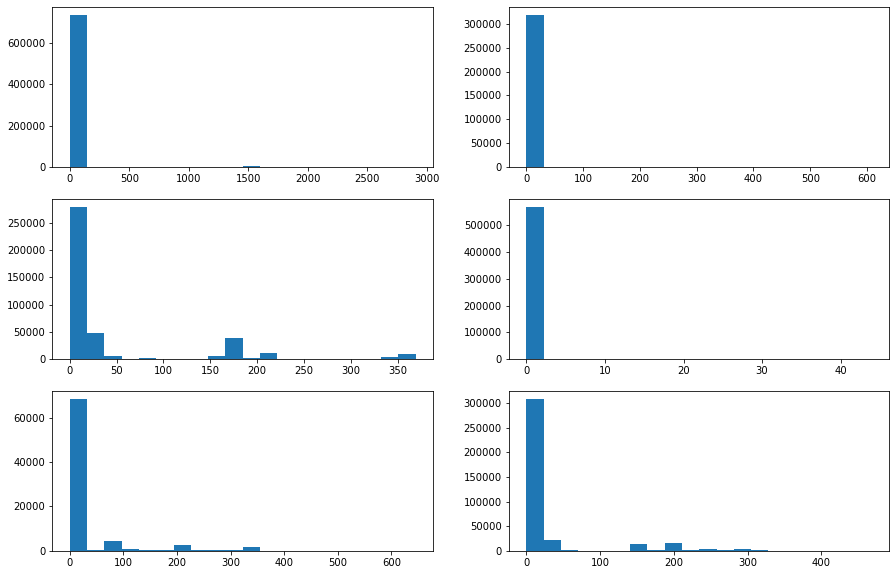

In [68]:
#Graficar los datos Tiempo UTC vs Potencia aparente
fig, ax = plt.subplots(3, 2,figsize=(15, 10))
ax[0, 0].hist(c11h1[1], bins=20) #row=0, col=0
ax[0, 1].hist(c11h2[1], bins=20) #row=0, col=1
ax[1, 0].hist(c11h3[1], bins=20) #row=0, col=2
ax[1, 1].hist(c11h4[1], bins=20) #row=1, col=0
ax[2, 0].hist(c11h5[1], bins=20) #row=1, col=1
ax[2, 1].hist(c11h6[1], bins=20) #row=1, col=2

## 12. Enchufe de baño

In [77]:
c12h1 = pd.read_csv(directory +'\low_freq\house_1\channel_12.dat',sep=r' ',encoding='utf-8',header=None)
#c12h2 = pd.read_csv(directory +'\low_freq\house_2\channel_12.dat',sep=r' ',encoding='utf-8',header=None)
c12h3 = pd.read_csv(directory +'\low_freq\house_3\channel_12.dat',sep=r' ',encoding='utf-8',header=None)
c12h4 = pd.read_csv(directory +'\low_freq\house_4\channel_12.dat',sep=r' ',encoding='utf-8',header=None)
c12h5 = pd.read_csv(directory +'\low_freq\house_5\channel_12.dat',sep=r' ',encoding='utf-8',header=None)
c12h6 = pd.read_csv(directory +'\low_freq\house_6\channel_12.dat',sep=r' ',encoding='utf-8',header=None)
n_datos1 = c12h1.shape[0]
#n_datos2 = c12h2.shape[0]
n_datos3 = c12h3.shape[0]
n_datos4 = c12h4.shape[0]
n_datos5 = c12h5.shape[0]
n_datos6 = c12h6.shape[0]
print(n_datos1)
print(n_datos2)
print(n_datos3)
print(n_datos4)
print(n_datos5)
print(n_datos6)

745878
318759
404107
570363
80417
376968


Separar los datos para graficarlos

In [78]:
x11 = c12h1[0]
y11 = c12h1[1]

#x12 = c12h2[0]
#y12 = c12h2[1]

x13 = c12h3[0]
y13 = c12h3[1]

x14 = c12h4[0]
y14 = c12h4[1]

x15 = c12h5[0]
y15 = c12h5[1]

x16 = c12h6[0]
y16 = c12h6[1]

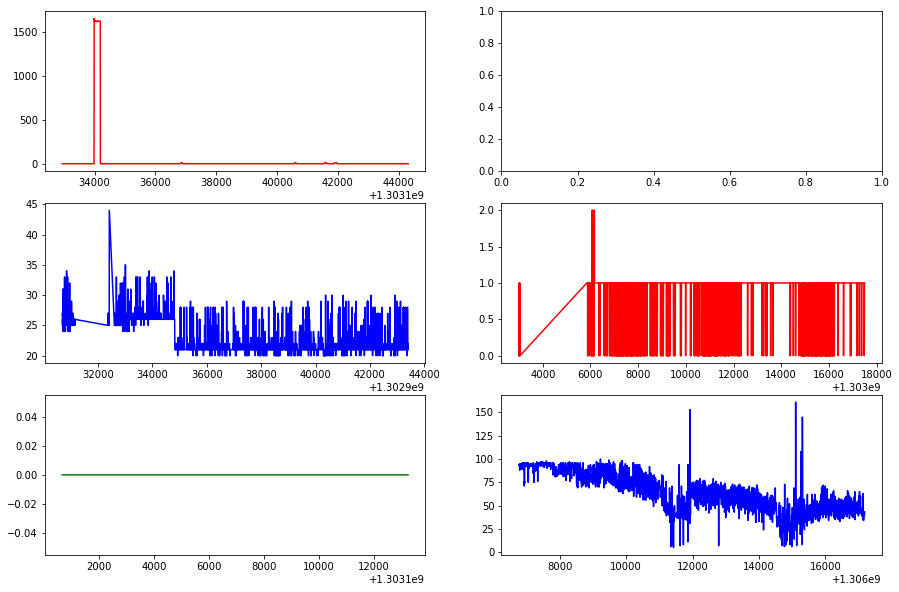

In [80]:
#Graficar los datos Tiempo UTC vs Potencia aparente
fig, ax = plt.subplots(3, 2,figsize=(15, 10))
ax[0, 0].plot(x11[:3000], y11[:3000], 'r') #row=0, col=0
#ax[0, 1].plot(x12, y12, 'g') #row=0, col=1
ax[1, 0].plot(x13[:3000], y13[:3000], 'b') #row=0, col=2
ax[1, 1].plot(x14[:3000], y14[:3000], 'r') #row=1, col=0
ax[2, 0].plot(x15[:3000], y15[:3000], 'g') #row=1, col=1
ax[2, 1].plot(x16[:3000], y16[:3000][:3000], 'b') #row=1, col=2

### Estadisticas de los datos
Se verificara la estadistica de los datos para tratar de inferir su comportamiento

1. Verificaremos si tenemos datos faltantes en los conjuntos de datos

In [72]:
print(c12h1.info())
print('<<<<<<<<<<<<<')
#print(c12h2.info())
print('<<<<<<<<<<<<<')
print(c12h3.info())
print('<<<<<<<<<<<<<')
print(c12h4.info())
print('<<<<<<<<<<<<<')
print(c12h5.info())
print('<<<<<<<<<<<<<')
print(c12h6.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 745878 entries, 0 to 745877
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0       745878 non-null  int64  
 1   1       745878 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 11.4 MB
None
<<<<<<<<<<<<<
<<<<<<<<<<<<<
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404107 entries, 0 to 404106
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0       404107 non-null  int64  
 1   1       404107 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 6.2 MB
None
<<<<<<<<<<<<<
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570363 entries, 0 to 570362
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0       570363 non-null  int64  
 1   1       570363 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 8.7 MB
None
<<<<<<

2. Analizaremos las estadisticas de los datos

In [73]:
print(c12h1.describe())
#print(c12h2.describe())
print(c12h3.describe())
print(c12h4.describe())
print(c12h5.describe())
print(c12h6.describe())

                  0              1
count  7.458780e+05  745878.000000
mean   1.304712e+09       6.494510
std    9.366811e+05      92.958057
min    1.303133e+09       0.000000
25%    1.303864e+09       1.000000
50%    1.304818e+09       1.000000
75%    1.305545e+09       1.000000
max    1.306267e+09    1686.000000
                  0              1
count  4.041070e+05  404107.000000
mean   1.304646e+09       3.689055
std    1.340995e+06      20.874317
min    1.302931e+09       0.000000
25%    1.303476e+09       0.000000
50%    1.303892e+09       0.000000
75%    1.306144e+09       0.000000
max    1.306801e+09     923.000000
                  0              1
count  5.703630e+05  570363.000000
mean   1.305132e+09       0.026899
std    1.469944e+06       0.195123
min    1.303003e+09       0.000000
25%    1.303763e+09       0.000000
50%    1.304307e+09       0.000000
75%    1.306605e+09       0.000000
max    1.307148e+09      29.000000
                  0             1
count  8.041700e+04  

3. Se usaran histogramas como ayuda visual para determinar la disperción de la medida de los datos y valores atipicos outliers

(array([3.06988e+05, 3.17300e+04, 2.23270e+04, 1.01780e+04, 2.20000e+03,
        1.31000e+03, 4.40000e+01, 4.00000e+01, 9.00000e+00, 2.92000e+02,
        9.21000e+02, 6.60000e+01, 2.00000e+01, 9.90000e+01, 1.00000e+01,
        9.50000e+01, 2.28000e+02, 3.26000e+02, 8.10000e+01, 4.00000e+00]),
 array([  0.,  27.,  54.,  81., 108., 135., 162., 189., 216., 243., 270.,
        297., 324., 351., 378., 405., 432., 459., 486., 513., 540.]),
 <a list of 20 Patch objects>)

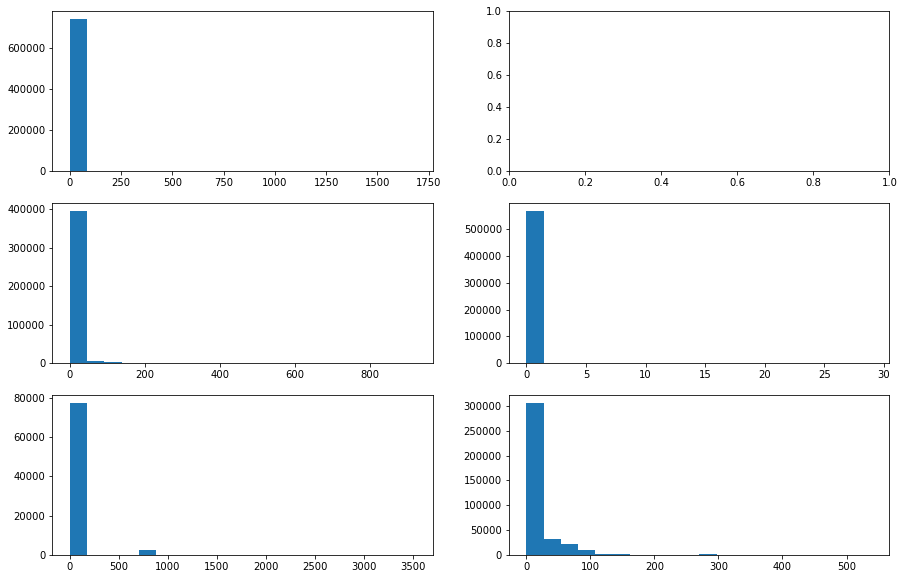

In [74]:
#Graficar los datos Tiempo UTC vs Potencia aparente
fig, ax = plt.subplots(3, 2,figsize=(15, 10))
ax[0, 0].hist(c12h1[1], bins=20) #row=0, col=0
#ax[0, 1].hist(c12h2[1], bins=20) #row=0, col=1
ax[1, 0].hist(c12h3[1], bins=20) #row=0, col=2
ax[1, 1].hist(c12h4[1], bins=20) #row=1, col=0
ax[2, 0].hist(c12h5[1], bins=20) #row=1, col=1
ax[2, 1].hist(c12h6[1], bins=20) #row=1, col=2

## 13. Aire Acondicionado

In [81]:
#Canal 1 Casa 1
c13h1 = pd.read_csv(directory +'\low_freq\house_1\channel_13.dat',sep=r' ',encoding='utf-8',header=None)
#c13h2 = pd.read_csv(directory +'\low_freq\house_2\channel_13.dat',sep=r' ',encoding='utf-8',header=None)
c13h3 = pd.read_csv(directory +'\low_freq\house_3\channel_13.dat',sep=r' ',encoding='utf-8',header=None)
c13h4 = pd.read_csv(directory +'\low_freq\house_4\channel_13.dat',sep=r' ',encoding='utf-8',header=None)
c13h5 = pd.read_csv(directory +'\low_freq\house_5\channel_13.dat',sep=r' ',encoding='utf-8',header=None)
c13h6 = pd.read_csv(directory +'\low_freq\house_6\channel_13.dat',sep=r' ',encoding='utf-8',header=None)
n_datos1 = c13h1.shape[0]
#n_datos2 = c13h2.shape[0]
n_datos3 = c13h3.shape[0]
n_datos4 = c13h4.shape[0]
n_datos5 = c13h5.shape[0]
n_datos6 = c13h6.shape[0]
print(n_datos1)
print(n_datos2)
print(n_datos3)
print(n_datos4)
print(n_datos5)
print(n_datos6)

745878
318759
404107
570363
80417
376968


Separar los datos para graficarlos

In [82]:
x11 = c13h1[0]
y11 = c13h1[1]

#x12 = c13h2[0]
#y12 = c13h2[1]

x13 = c13h3[0]
y13 = c13h3[1]

x14 = c13h4[0]
y14 = c13h4[1]

x15 = c13h5[0]
y15 = c13h5[1]

x16 = c13h6[0]
y16 = c13h6[1]

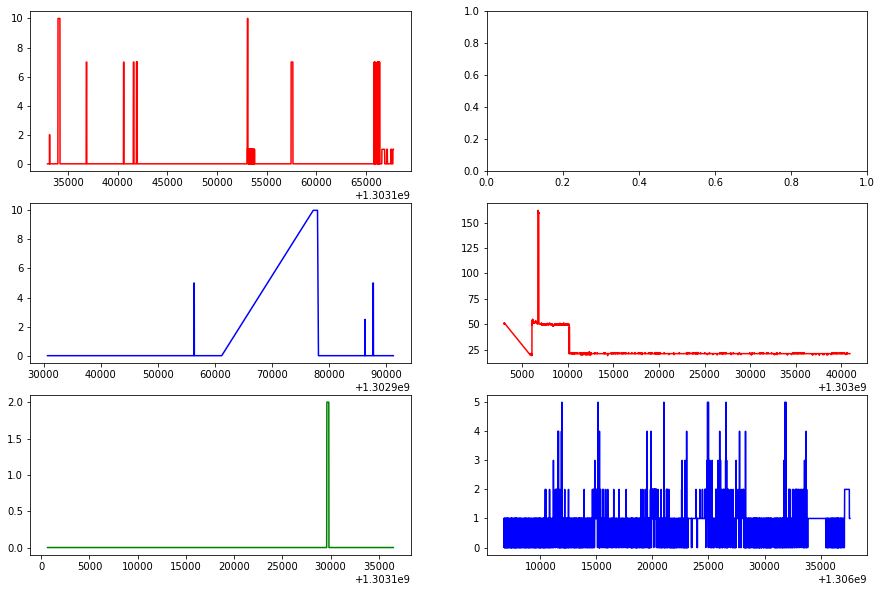

In [83]:
#Graficar los datos Tiempo UTC vs Potencia aparente
fig, ax = plt.subplots(3, 2,figsize=(15, 10))
ax[0, 0].plot(x11[:9000], y11[:9000], 'r') #row=0, col=0
#ax[0, 1].plot(x12, y12, 'g') #row=0, col=1
ax[1, 0].plot(x13[:9000], y13[:9000], 'b') #row=0, col=2
ax[1, 1].plot(x14[:9000], y14[:9000], 'r') #row=1, col=0
ax[2, 0].plot(x15[:9000], y15[:9000], 'g') #row=1, col=1
ax[2, 1].plot(x16[:9000], y16[:9000], 'b') #row=1, col=2

### Estadisticas de los datos
Se verificara la estadistica de los datos para tratar de inferir su comportamiento

1. Verificaremos si tenemos datos faltantes en los conjuntos de datos

In [78]:
print(c13h1.info())
print('<<<<<<<<<<<<<')
#print(c13h2.info())
print('<<<<<<<<<<<<<')
print(c13h3.info())
print('<<<<<<<<<<<<<')
print(c13h4.info())
print('<<<<<<<<<<<<<')
print(c13h5.info())
print('<<<<<<<<<<<<<')
print(c13h6.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 745878 entries, 0 to 745877
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0       745878 non-null  int64  
 1   1       745878 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 11.4 MB
None
<<<<<<<<<<<<<
<<<<<<<<<<<<<
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404107 entries, 0 to 404106
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0       404107 non-null  int64  
 1   1       404107 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 6.2 MB
None
<<<<<<<<<<<<<
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570363 entries, 0 to 570362
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0       570363 non-null  int64  
 1   1       570363 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 8.7 MB
None
<<<<<<

2. Analizaremos las estadisticas de los datos

In [79]:
print(c13h1.describe())
#print(c13h2.describe())
print(c13h3.describe())
print(c13h4.describe())
print(c13h5.describe())
print(c13h6.describe())

                  0              1
count  7.458780e+05  745878.000000
mean   1.304712e+09       0.119570
std    9.366811e+05       1.025647
min    1.303133e+09       0.000000
25%    1.303864e+09       0.000000
50%    1.304818e+09       0.000000
75%    1.305545e+09       0.000000
max    1.306267e+09     192.000000
                  0              1
count  4.041070e+05  404107.000000
mean   1.304646e+09      33.715186
std    1.340995e+06     275.043517
min    1.302931e+09       0.000000
25%    1.303476e+09       0.000000
50%    1.303892e+09       0.000000
75%    1.306144e+09       0.000000
max    1.306801e+09    2707.500000
                  0              1
count  5.703630e+05  570363.000000
mean   1.305132e+09      33.043614
std    1.469944e+06      20.569748
min    1.303003e+09       5.000000
25%    1.303763e+09      23.000000
50%    1.304307e+09      25.000000
75%    1.306605e+09      35.000000
max    1.307148e+09     181.000000
                  0             1
count  8.041700e+04  

3. Se usaran histogramas como ayuda visual para determinar la disperción de la medida de los datos y valores atipicos outliers

(array([3.5219e+05, 1.2990e+04, 4.4360e+03, 2.7740e+03, 1.7200e+02,
        4.0300e+02, 1.8000e+01, 3.6500e+02, 7.6800e+02, 1.4500e+02,
        1.6800e+02, 3.9000e+02, 6.1600e+02, 2.3400e+02, 2.5200e+02,
        1.8000e+02, 1.2000e+02, 1.8900e+02, 2.4800e+02, 3.1000e+02]),
 array([ 0.,  4.,  8., 12., 16., 20., 24., 28., 32., 36., 40., 44., 48.,
        52., 56., 60., 64., 68., 72., 76., 80.]),
 <a list of 20 Patch objects>)

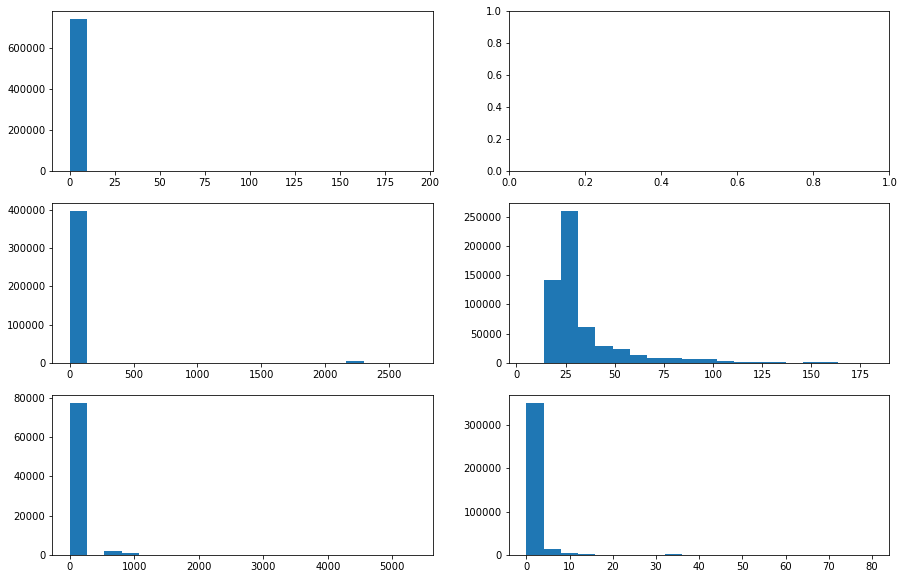

In [80]:
#Graficar los datos Tiempo UTC vs Potencia aparente
fig, ax = plt.subplots(3, 2,figsize=(15, 10))
ax[0, 0].hist(c13h1[1], bins=20) #row=0, col=0
#ax[0, 1].hist(c13h2[1], bins=20) #row=0, col=1
ax[1, 0].hist(c13h3[1], bins=20) #row=0, col=2
ax[1, 1].hist(c13h4[1], bins=20) #row=1, col=0
ax[2, 0].hist(c13h5[1], bins=20) #row=1, col=1
ax[2, 1].hist(c13h6[1], bins=20) #row=1, col=2

## 14. Estufa

In [84]:
#Canal 1 Casa 1
c14h1 = pd.read_csv(directory +'\low_freq\house_1\channel_14.dat',sep=r' ',encoding='utf-8',header=None)
#c14h2 = pd.read_csv(directory +'\low_freq\house_2\channel_14.dat',sep=r' ',encoding='utf-8',header=None)
c14h3 = pd.read_csv(directory +'\low_freq\house_3\channel_14.dat',sep=r' ',encoding='utf-8',header=None)
c14h4 = pd.read_csv(directory +'\low_freq\house_4\channel_14.dat',sep=r' ',encoding='utf-8',header=None)
c14h5 = pd.read_csv(directory +'\low_freq\house_5\channel_14.dat',sep=r' ',encoding='utf-8',header=None)
c14h6 = pd.read_csv(directory +'\low_freq\house_6\channel_14.dat',sep=r' ',encoding='utf-8',header=None)
n_datos1 = c14h1.shape[0]
#n_datos2 = c14h2.shape[0]
n_datos3 = c14h3.shape[0]
n_datos4 = c14h4.shape[0]
n_datos5 = c14h5.shape[0]
n_datos6 = c14h6.shape[0]
print(n_datos1)
#print(n_datos2)
print(n_datos3)
print(n_datos4)
print(n_datos5)
print(n_datos6)

745878
404107
570363
80417
376968


Separar los datos para graficarlos

In [85]:
x11 = c14h1[0]
y11 = c14h1[1]

#x12 = c14h2[0]
#y12 = c14h2[1]

x13 = c14h3[0]
y13 = c14h3[1]

x14 = c14h4[0]
y14 = c14h4[1]

x15 = c14h5[0]
y15 = c14h5[1]

x16 = c14h6[0]
y16 = c14h6[1]

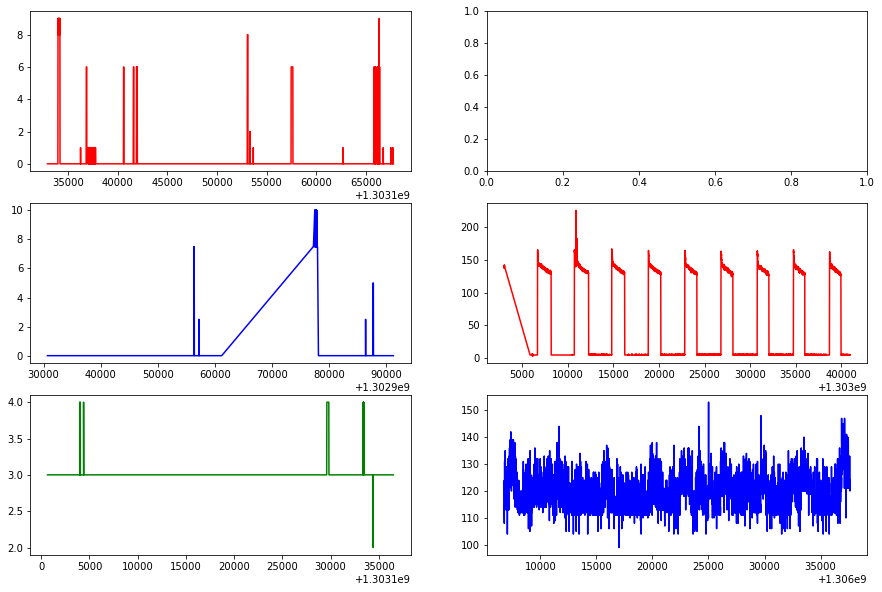

In [86]:
#Graficar los datos Tiempo UTC vs Potencia aparente
fig, ax = plt.subplots(3, 2,figsize=(15, 10))
ax[0, 0].plot(x11[:9000], y11[:9000], 'r') #row=0, col=0
#ax[0, 1].plot(x12, y12, 'g') #row=0, col=1
ax[1, 0].plot(x13[:9000], y13[:9000], 'b') #row=0, col=2
ax[1, 1].plot(x14[:9000], y14[:9000], 'r') #row=1, col=0
ax[2, 0].plot(x15[:9000], y15[:9000][:9000], 'g') #row=1, col=1
ax[2, 1].plot(x16[:9000], y16[:9000][:9000][:9000], 'b') #row=1, col=2

### Estadisticas de los datos
Se verificara la estadistica de los datos para tratar de inferir su comportamiento

1. Verificaremos si tenemos datos faltantes en los conjuntos de datos

In [84]:
print(c14h1.info())
print('<<<<<<<<<<<<<')
#print(c14h2.info())
print('<<<<<<<<<<<<<')
print(c14h3.info())
print('<<<<<<<<<<<<<')
print(c14h4.info())
print('<<<<<<<<<<<<<')
print(c14h5.info())
print('<<<<<<<<<<<<<')
print(c14h6.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 745878 entries, 0 to 745877
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0       745878 non-null  int64  
 1   1       745878 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 11.4 MB
None
<<<<<<<<<<<<<
<<<<<<<<<<<<<
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404107 entries, 0 to 404106
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0       404107 non-null  int64  
 1   1       404107 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 6.2 MB
None
<<<<<<<<<<<<<
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570363 entries, 0 to 570362
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0       570363 non-null  int64  
 1   1       570363 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 8.7 MB
None
<<<<<<

2. Analizaremos las estadisticas de los datos

In [85]:
print(c14h1.describe())
#print(c14h2.describe())
print(c14h3.describe())
print(c14h4.describe())
print(c14h5.describe())
print(c14h6.describe())

                  0              1
count  7.458780e+05  745878.000000
mean   1.304712e+09       0.516229
std    9.366811e+05      24.129074
min    1.303133e+09       0.000000
25%    1.303864e+09       0.000000
50%    1.304818e+09       0.000000
75%    1.305545e+09       0.000000
max    1.306267e+09    1483.000000
                  0              1
count  4.041070e+05  404107.000000
mean   1.304646e+09      44.024182
std    1.340995e+06     306.554807
min    1.302931e+09       0.000000
25%    1.303476e+09       0.000000
50%    1.303892e+09       0.000000
75%    1.306144e+09       0.000000
max    1.306801e+09    4007.500000
                  0              1
count  5.703630e+05  570363.000000
mean   1.305132e+09      62.876312
std    1.469944e+06      81.313088
min    1.303003e+09       0.000000
25%    1.303763e+09       6.000000
50%    1.304307e+09       8.000000
75%    1.306605e+09     137.000000
max    1.307148e+09    2140.000000
                  0             1
count  8.041700e+04  

3. Se usaran histogramas como ayuda visual para determinar la disperción de la medida de los datos y valores atipicos outliers

(array([2.03902e+05, 1.72908e+05, 2.60000e+01, 2.00000e+00, 2.00000e+00,
        1.00000e+00, 4.00000e+00, 6.70000e+01, 2.90000e+01, 1.50000e+01,
        3.00000e+00, 2.00000e+00, 1.00000e+00, 1.00000e+00, 1.00000e+00,
        1.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 2.00000e+00]),
 array([   4. ,  125.3,  246.6,  367.9,  489.2,  610.5,  731.8,  853.1,
         974.4, 1095.7, 1217. , 1338.3, 1459.6, 1580.9, 1702.2, 1823.5,
        1944.8, 2066.1, 2187.4, 2308.7, 2430. ]),
 <a list of 20 Patch objects>)

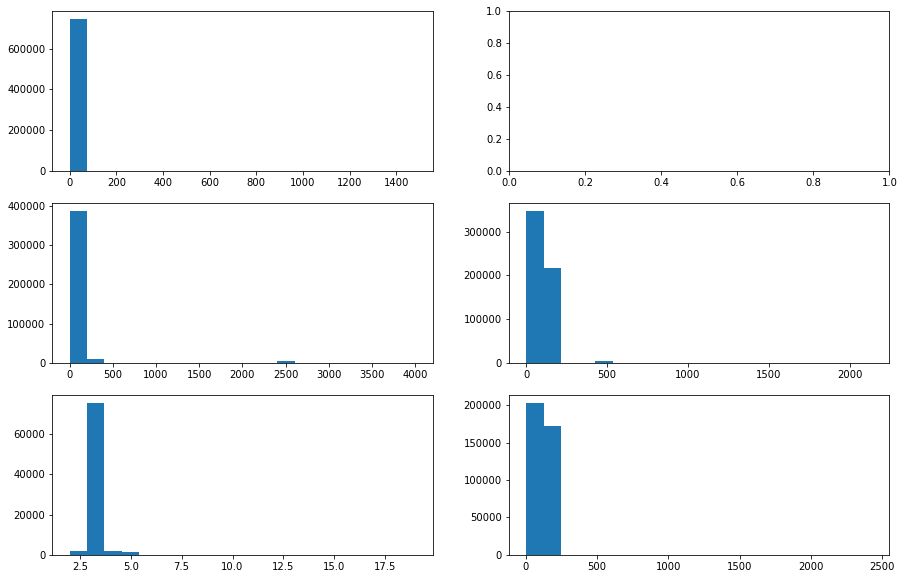

In [86]:
#Graficar los datos Tiempo UTC vs Potencia aparente
fig, ax = plt.subplots(3, 2,figsize=(15, 10))
ax[0, 0].hist(c14h1[1], bins=20) #row=0, col=0
#ax[0, 1].hist(c14h2[1], bins=20) #row=0, col=1
ax[1, 0].hist(c14h3[1], bins=20) #row=0, col=2
ax[1, 1].hist(c14h4[1], bins=20) #row=1, col=0
ax[2, 0].hist(c14h5[1], bins=20) #row=1, col=1
ax[2, 1].hist(c14h6[1], bins=20) #row=1, col=2

## 15. Cocina 3

In [87]:
#Canal 1 Casa 1
c15h1 = pd.read_csv(directory +'\low_freq\house_1\channel_15.dat',sep=r' ',encoding='utf-8',header=None)
#c15h2 = pd.read_csv(directory +'\low_freq\house_2\channel_15.dat',sep=r' ',encoding='utf-8',header=None)
c15h3 = pd.read_csv(directory +'\low_freq\house_3\channel_15.dat',sep=r' ',encoding='utf-8',header=None)
c15h4 = pd.read_csv(directory +'\low_freq\house_4\channel_15.dat',sep=r' ',encoding='utf-8',header=None)
c15h5 = pd.read_csv(directory +'\low_freq\house_5\channel_15.dat',sep=r' ',encoding='utf-8',header=None)
c15h6 = pd.read_csv(directory +'\low_freq\house_6\channel_15.dat',sep=r' ',encoding='utf-8',header=None)
n_datos1 = c15h1.shape[0]
#n_datos2 = c15h2.shape[0]
n_datos3 = c15h3.shape[0]
n_datos4 = c15h4.shape[0]
n_datos5 = c15h5.shape[0]
n_datos6 = c15h6.shape[0]
print(n_datos1)
print(n_datos2)
print(n_datos3)
print(n_datos4)
print(n_datos5)
print(n_datos6)

745878
318759
404107
570363
80417
376968


Separar los datos para graficarlos

In [88]:
x11 = c15h1[0]
y11 = c15h1[1]

#x12 = c15h2[0]
#y12 = c15h2[1]

x13 = c15h3[0]
y13 = c15h3[1]

x14 = c15h4[0]
y14 = c15h4[1]

x15 = c15h5[0]
y15 = c15h5[1]

x16 = c15h6[0]
y16 = c15h6[1]

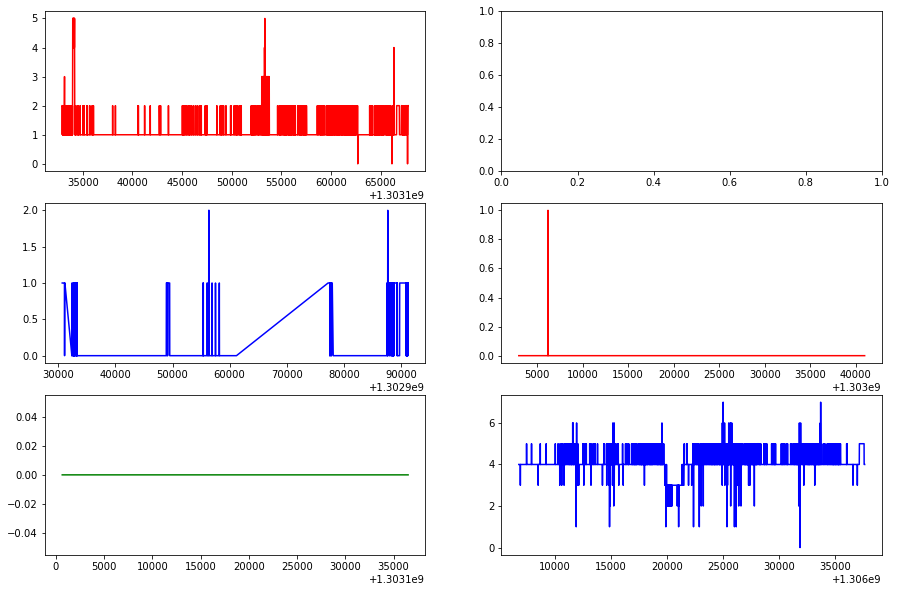

In [89]:
#Graficar los datos Tiempo UTC vs Potencia aparente
fig, ax = plt.subplots(3, 2,figsize=(15, 10))
ax[0, 0].plot(x11[:9000], y11[:9000], 'r') #row=0, col=0
#ax[0, 1].plot(x12, y12, 'g') #row=0, col=1
ax[1, 0].plot(x13[:9000], y13[:9000], 'b') #row=0, col=2
ax[1, 1].plot(x14[:9000], y14[:9000][:9000], 'r') #row=1, col=0
ax[2, 0].plot(x15[:9000], y15[:9000], 'g') #row=1, col=1
ax[2, 1].plot(x16[:9000], y16[:9000][:9000], 'b') #row=1, col=2

### Estadisticas de los datos
Se verificara la estadistica de los datos para tratar de inferir su comportamiento

1. Verificaremos si tenemos datos faltantes en los conjuntos de datos

In [90]:
print(c15h1.info())
print('<<<<<<<<<<<<<')
#print(c15h2.info())
print('<<<<<<<<<<<<<')
print(c15h3.info())
print('<<<<<<<<<<<<<')
print(c15h4.info())
print('<<<<<<<<<<<<<')
print(c15h5.info())
print('<<<<<<<<<<<<<')
print(c15h6.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 745878 entries, 0 to 745877
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0       745878 non-null  int64  
 1   1       745878 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 11.4 MB
None
<<<<<<<<<<<<<
<<<<<<<<<<<<<
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404107 entries, 0 to 404106
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0       404107 non-null  int64  
 1   1       404107 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 6.2 MB
None
<<<<<<<<<<<<<
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570363 entries, 0 to 570362
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0       570363 non-null  int64  
 1   1       570363 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 8.7 MB
None
<<<<<<

2. Analizaremos las estadisticas de los datos

In [91]:
print(c15h1.describe())
#print(c15h2.describe())
print(c15h3.describe())
print(c15h4.describe())
print(c15h5.describe())
print(c15h6.describe())

                  0              1
count  7.458780e+05  745878.000000
mean   1.304712e+09       5.582886
std    9.366811e+05      69.298808
min    1.303133e+09       0.000000
25%    1.303864e+09       1.000000
50%    1.304818e+09       1.000000
75%    1.305545e+09       1.000000
max    1.306267e+09    1127.000000
                  0              1
count  4.041070e+05  404107.000000
mean   1.304646e+09       0.174496
std    1.340995e+06       0.525553
min    1.302931e+09       0.000000
25%    1.303476e+09       0.000000
50%    1.303892e+09       0.000000
75%    1.306144e+09       0.000000
max    1.306801e+09      49.000000
                  0              1
count  5.703630e+05  570363.000000
mean   1.305132e+09       7.780203
std    1.469944e+06      98.577396
min    1.303003e+09       0.000000
25%    1.303763e+09       0.000000
50%    1.304307e+09       0.000000
75%    1.306605e+09       0.000000
max    1.307148e+09    1397.000000
                  0             1
count  8.041700e+04  

3. Se usaran histogramas como ayuda visual para determinar la disperción de la medida de los datos y valores atipicos outliers

(array([3.53892e+05, 2.86000e+02, 1.20000e+01, 6.00000e+00, 5.99000e+02,
        1.12000e+02, 8.00000e+00, 2.69100e+03, 1.92390e+04, 8.00000e+00,
        1.10000e+01, 7.60000e+01, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        4.00000e+00, 5.00000e+00, 0.00000e+00, 3.00000e+00, 1.50000e+01]),
 array([   0.  ,   50.65,  101.3 ,  151.95,  202.6 ,  253.25,  303.9 ,
         354.55,  405.2 ,  455.85,  506.5 ,  557.15,  607.8 ,  658.45,
         709.1 ,  759.75,  810.4 ,  861.05,  911.7 ,  962.35, 1013.  ]),
 <a list of 20 Patch objects>)

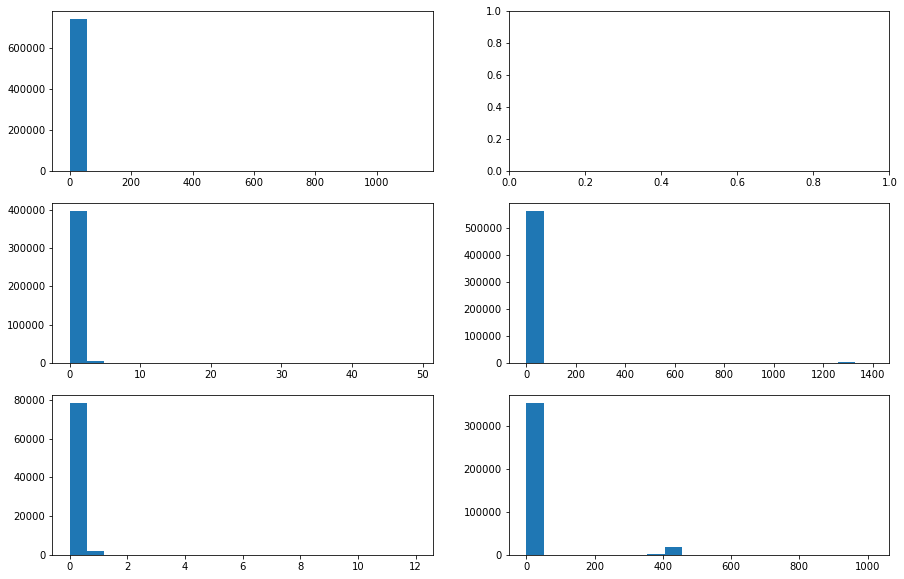

In [92]:
#Graficar los datos Tiempo UTC vs Potencia aparente
fig, ax = plt.subplots(3, 2,figsize=(15, 10))
ax[0, 0].hist(c15h1[1], bins=20) #row=0, col=0
#ax[0, 1].hist(c15h2[1], bins=20) #row=0, col=1
ax[1, 0].hist(c15h3[1], bins=20) #row=0, col=2
ax[1, 1].hist(c15h4[1], bins=20) #row=1, col=0
ax[2, 0].hist(c15h5[1], bins=20) #row=1, col=1
ax[2, 1].hist(c15h6[1], bins=20) #row=1, col=2

## 16. Cocina 4

In [90]:
#Canal 1 Casa 1
c16h1 = pd.read_csv(directory +'\low_freq\house_1\channel_16.dat',sep=r' ',encoding='utf-8',header=None)
#c16h2 = pd.read_csv(directory +'\low_freq\house_2\channel_16.dat',sep=r' ',encoding='utf-8',header=None)
c16h3 = pd.read_csv(directory +'\low_freq\house_3\channel_16.dat',sep=r' ',encoding='utf-8',header=None)
c16h4 = pd.read_csv(directory +'\low_freq\house_4\channel_16.dat',sep=r' ',encoding='utf-8',header=None)
c16h5 = pd.read_csv(directory +'\low_freq\house_5\channel_16.dat',sep=r' ',encoding='utf-8',header=None)
c16h6 = pd.read_csv(directory +'\low_freq\house_6\channel_16.dat',sep=r' ',encoding='utf-8',header=None)
n_datos1 = c16h1.shape[0]
#n_datos2 = c16h2.shape[0]
n_datos3 = c16h3.shape[0]
n_datos4 = c16h4.shape[0]
n_datos5 = c16h5.shape[0]
n_datos6 = c16h6.shape[0]
print(n_datos1)
print(n_datos2)
print(n_datos3)
print(n_datos4)
print(n_datos5)
print(n_datos6)

745878
318759
404107
570363
80417
376968


Separar los datos para graficarlos

In [91]:
x11 = c16h1[0]
y11 = c16h1[1]

#x12 = c16h2[0]
#y12 = c16h2[1]

x13 = c16h3[0]
y13 = c16h3[1]

x14 = c16h4[0]
y14 = c16h4[1]

x15 = c16h5[0]
y15 = c16h5[1]

x16 = c16h6[0]
y16 = c16h6[1]

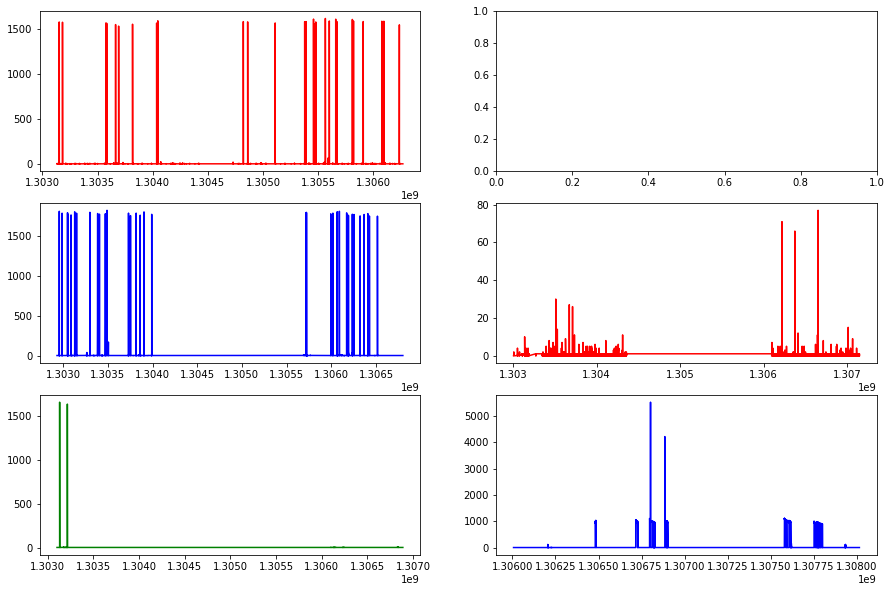

In [95]:
#Graficar los datos Tiempo UTC vs Potencia aparente
fig, ax = plt.subplots(3, 2,figsize=(15, 10))
ax[0, 0].plot(x11, y11, 'r') #row=0, col=0
#ax[0, 1].plot(x12, y12, 'g') #row=0, col=1
ax[1, 0].plot(x13, y13, 'b') #row=0, col=2
ax[1, 1].plot(x14, y14, 'r') #row=1, col=0
ax[2, 0].plot(x15, y15, 'g') #row=1, col=1
ax[2, 1].plot(x16, y16, 'b') #row=1, col=2

### Estadisticas de los datos
Se verificara la estadistica de los datos para tratar de inferir su comportamiento

1. Verificaremos si tenemos datos faltantes en los conjuntos de datos

In [96]:
print(c16h1.info())
print('<<<<<<<<<<<<<')
#print(c16h2.info())
print('<<<<<<<<<<<<<')
print(c16h3.info())
print('<<<<<<<<<<<<<')
print(c16h4.info())
print('<<<<<<<<<<<<<')
print(c16h5.info())
print('<<<<<<<<<<<<<')
print(c16h6.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 745878 entries, 0 to 745877
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0       745878 non-null  int64  
 1   1       745878 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 11.4 MB
None
<<<<<<<<<<<<<
<<<<<<<<<<<<<
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404107 entries, 0 to 404106
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0       404107 non-null  int64  
 1   1       404107 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 6.2 MB
None
<<<<<<<<<<<<<
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570363 entries, 0 to 570362
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0       570363 non-null  int64  
 1   1       570363 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 8.7 MB
None
<<<<<<

2. Analizaremos las estadisticas de los datos

In [97]:
print(c16h1.describe())
#print(c16h2.describe())
print(c16h3.describe())
print(c16h4.describe())
print(c16h5.describe())
print(c16h6.describe())

                  0              1
count  7.458780e+05  745878.000000
mean   1.304712e+09       2.755799
std    9.366811e+05      63.915365
min    1.303133e+09       0.000000
25%    1.303864e+09       0.000000
50%    1.304818e+09       0.000000
75%    1.305545e+09       0.000000
max    1.306267e+09    1616.000000
                  0             1
count  4.041070e+05  404107.00000
mean   1.304646e+09       8.22742
std    1.340995e+06     100.53505
min    1.302931e+09       0.00000
25%    1.303476e+09       2.00000
50%    1.303892e+09       2.00000
75%    1.306144e+09       2.00000
max    1.306801e+09    1817.00000
                  0              1
count  5.703630e+05  570363.000000
mean   1.305132e+09       0.537924
std    1.469944e+06       0.565637
min    1.303003e+09       0.000000
25%    1.303763e+09       0.000000
50%    1.304307e+09       1.000000
75%    1.306605e+09       1.000000
max    1.307148e+09      77.000000
                  0             1
count  8.041700e+04  80417.000

3. Se usaran histogramas como ayuda visual para determinar la disperción de la medida de los datos y valores atipicos outliers

(array([3.56551e+05, 0.00000e+00, 5.00000e+00, 2.04040e+04, 6.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([   0. ,  276.2,  552.4,  828.6, 1104.8, 1381. , 1657.2, 1933.4,
        2209.6, 2485.8, 2762. , 3038.2, 3314.4, 3590.6, 3866.8, 4143. ,
        4419.2, 4695.4, 4971.6, 5247.8, 5524. ]),
 <a list of 20 Patch objects>)

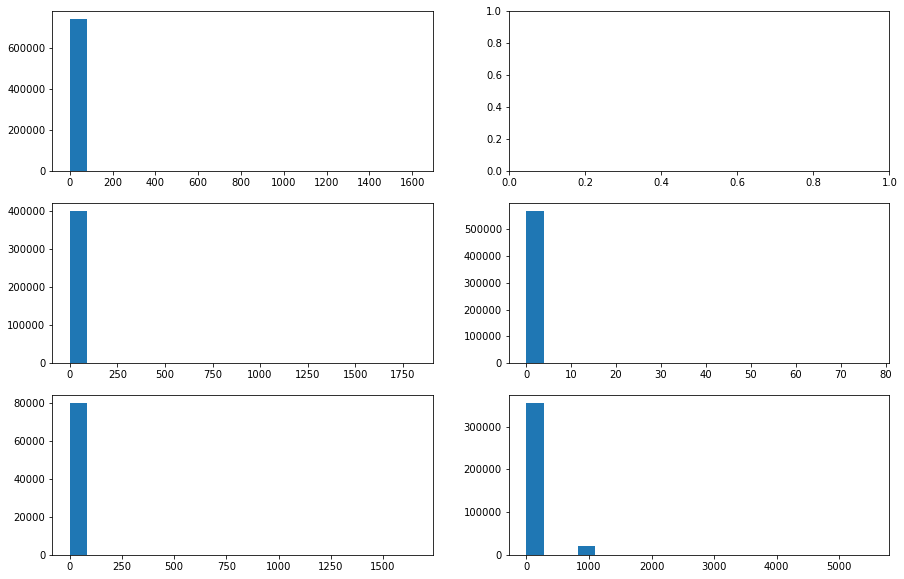

In [98]:
#Graficar los datos Tiempo UTC vs Potencia aparente
fig, ax = plt.subplots(3, 2,figsize=(15, 10))
ax[0, 0].hist(c16h1[1], bins=20) #row=0, col=0
#ax[0, 1].hist(c16h2[1], bins=20) #row=0, col=1
ax[1, 0].hist(c16h3[1], bins=20) #row=0, col=2
ax[1, 1].hist(c16h4[1], bins=20) #row=1, col=0
ax[2, 0].hist(c16h5[1], bins=20) #row=1, col=1
ax[2, 1].hist(c16h6[1], bins=20) #row=1, col=2

## 17. Iluminación 2

In [92]:
#Canal 1 Casa 1
c17h1 = pd.read_csv(directory +'\low_freq\house_1\channel_17.dat',sep=r' ',encoding='utf-8',header=None)
#c17h2 = pd.read_csv(directory +'\low_freq\house_2\channel_17.dat',sep=r' ',encoding='utf-8',header=None)
c17h3 = pd.read_csv(directory +'\low_freq\house_3\channel_17.dat',sep=r' ',encoding='utf-8',header=None)
c17h4 = pd.read_csv(directory +'\low_freq\house_4\channel_17.dat',sep=r' ',encoding='utf-8',header=None)
c17h5 = pd.read_csv(directory +'\low_freq\house_5\channel_17.dat',sep=r' ',encoding='utf-8',header=None)
c17h6 = pd.read_csv(directory +'\low_freq\house_6\channel_17.dat',sep=r' ',encoding='utf-8',header=None)
n_datos1 = c17h1.shape[0]
#n_datos2 = c17h2.shape[0]
n_datos3 = c17h3.shape[0]
n_datos4 = c17h4.shape[0]
n_datos5 = c17h5.shape[0]
n_datos6 = c17h6.shape[0]
print(n_datos1)
print(n_datos2)
print(n_datos3)
print(n_datos4)
print(n_datos5)
print(n_datos6)

745878
318759
404107
570363
80417
376968


Separar los datos para graficarlos

In [93]:
x11 = c17h1[0]
y11 = c17h1[1]

#x12 = c17h2[0]
#y12 = c17h2[1]

x13 = c17h3[0]
y13 = c17h3[1]

x14 = c17h4[0]
y14 = c17h4[1]

x15 = c17h5[0]
y15 = c17h5[1]

x16 = c17h6[0]
y16 = c17h6[1]

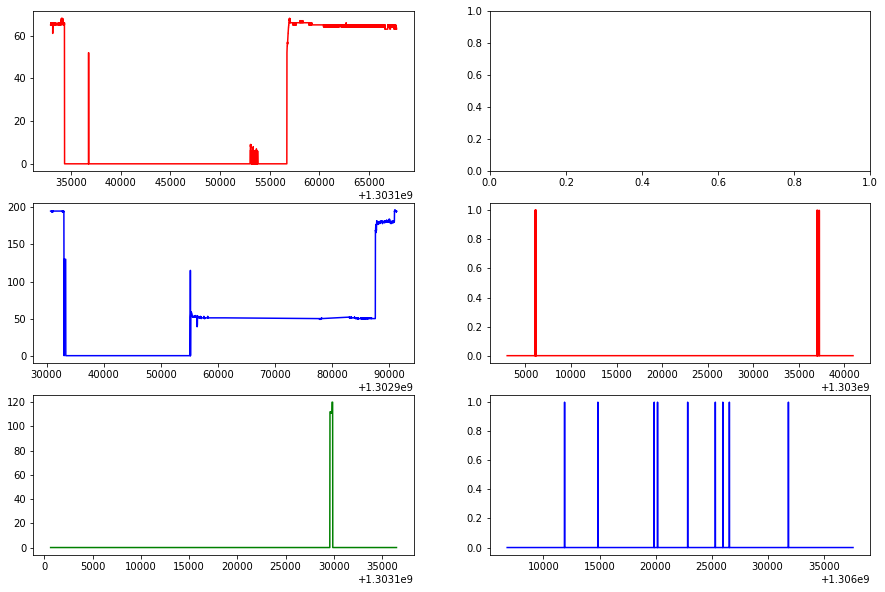

In [94]:
#Graficar los datos Tiempo UTC vs Potencia aparente
fig, ax = plt.subplots(3, 2,figsize=(15, 10))
ax[0, 0].plot(x11[:9000], y11[:9000], 'r') #row=0, col=0
#ax[0, 1].plot(x12, y12, 'g') #row=0, col=1
ax[1, 0].plot(x13[:9000], y13[:9000], 'b') #row=0, col=2
ax[1, 1].plot(x14[:9000], y14[:9000], 'r') #row=1, col=0
ax[2, 0].plot(x15[:9000], y15[:9000], 'g') #row=1, col=1
ax[2, 1].plot(x16[:9000], y16[:9000], 'b') #row=1, col=2

### Estadisticas de los datos
Se verificara la estadistica de los datos para tratar de inferir su comportamiento

1. Verificaremos si tenemos datos faltantes en los conjuntos de datos

In [102]:
print(c17h1.info())
print('<<<<<<<<<<<<<')
#print(c17h2.info())
print('<<<<<<<<<<<<<')
print(c17h3.info())
print('<<<<<<<<<<<<<')
print(c17h4.info())
print('<<<<<<<<<<<<<')
print(c17h5.info())
print('<<<<<<<<<<<<<')
print(c17h6.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 745878 entries, 0 to 745877
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0       745878 non-null  int64  
 1   1       745878 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 11.4 MB
None
<<<<<<<<<<<<<
<<<<<<<<<<<<<
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404107 entries, 0 to 404106
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0       404107 non-null  int64  
 1   1       404107 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 6.2 MB
None
<<<<<<<<<<<<<
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570363 entries, 0 to 570362
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0       570363 non-null  int64  
 1   1       570363 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 8.7 MB
None
<<<<<<

2. Analizaremos las estadisticas de los datos

In [103]:
print(c17h1.describe())
#print(c17h2.describe())
print(c17h3.describe())
print(c17h4.describe())
print(c17h5.describe())
print(c17h6.describe())

                  0              1
count  7.458780e+05  745878.000000
mean   1.304712e+09      23.168825
std    9.366811e+05      31.770164
min    1.303133e+09       0.000000
25%    1.303864e+09       0.000000
50%    1.304818e+09       0.000000
75%    1.305545e+09      64.000000
max    1.306267e+09     114.000000
                  0              1
count  4.041070e+05  404107.000000
mean   1.304646e+09      35.856419
std    1.340995e+06      63.957420
min    1.302931e+09       0.000000
25%    1.303476e+09       0.000000
50%    1.303892e+09       0.000000
75%    1.306144e+09      50.000000
max    1.306801e+09     447.000000
                  0              1
count  5.703630e+05  570363.000000
mean   1.305132e+09       0.579967
std    1.469944e+06      18.987305
min    1.303003e+09       0.000000
25%    1.303763e+09       0.000000
50%    1.304307e+09       0.000000
75%    1.306605e+09       1.000000
max    1.307148e+09    1161.000000
                  0             1
count  8.041700e+04  

3. Se usaran histogramas como ayuda visual para determinar la disperción de la medida de los datos y valores atipicos outliers

(array([3.56552e+05, 0.00000e+00, 4.00000e+00, 2.04100e+04, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([   0. ,  274.3,  548.6,  822.9, 1097.2, 1371.5, 1645.8, 1920.1,
        2194.4, 2468.7, 2743. , 3017.3, 3291.6, 3565.9, 3840.2, 4114.5,
        4388.8, 4663.1, 4937.4, 5211.7, 5486. ]),
 <a list of 20 Patch objects>)

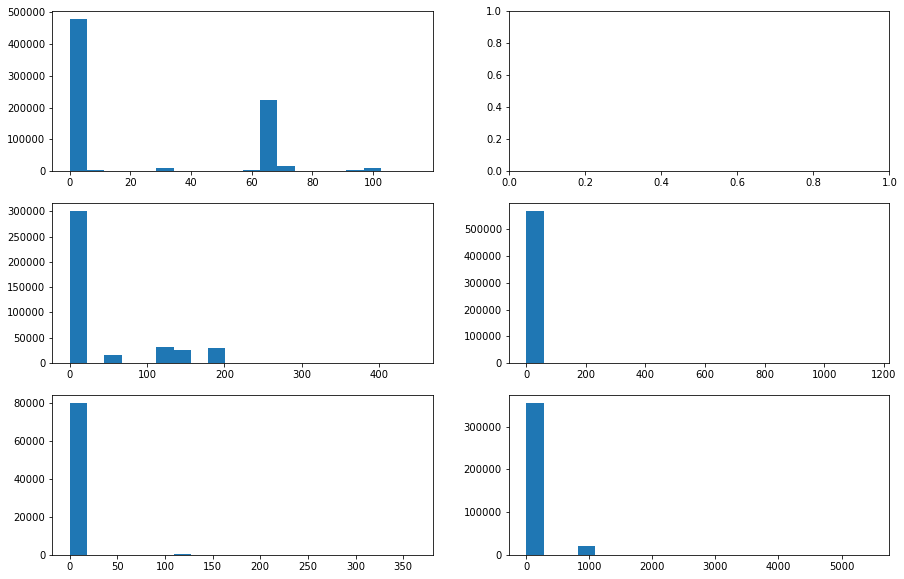

In [104]:
#Graficar los datos Tiempo UTC vs Potencia aparente
fig, ax = plt.subplots(3, 2,figsize=(15, 10))
ax[0, 0].hist(c17h1[1], bins=20) #row=0, col=0
#ax[0, 1].hist(c17h2[1], bins=20) #row=0, col=1
ax[1, 0].hist(c17h3[1], bins=20) #row=0, col=2
ax[1, 1].hist(c17h4[1], bins=20) #row=1, col=0
ax[2, 0].hist(c17h5[1], bins=20) #row=1, col=1
ax[2, 1].hist(c17h6[1], bins=20) #row=1, col=2

## 18. Iluminación 3

In [95]:
#Canal 1 Casa 1
c18h1 = pd.read_csv(directory +'\low_freq\house_1\channel_18.dat',sep=r' ',encoding='utf-8',header=None)
#c18h2 = pd.read_csv(directory +'\low_freq\house_2\channel_18.dat',sep=r' ',encoding='utf-8',header=None)
c18h3 = pd.read_csv(directory +'\low_freq\house_3\channel_18.dat',sep=r' ',encoding='utf-8',header=None)
c18h4 = pd.read_csv(directory +'\low_freq\house_4\channel_18.dat',sep=r' ',encoding='utf-8',header=None)
c18h5 = pd.read_csv(directory +'\low_freq\house_5\channel_18.dat',sep=r' ',encoding='utf-8',header=None)
#c18h6 = pd.read_csv(directory +'\low_freq\house_6\channel_18.dat',sep=r' ',encoding='utf-8',header=None)
n_datos1 = c18h1.shape[0]
#n_datos2 = c18h2.shape[0]
n_datos3 = c18h3.shape[0]
n_datos4 = c18h4.shape[0]
n_datos5 = c18h5.shape[0]
#n_datos6 = c18h6.shape[0]
print(n_datos1)
#print(n_datos2)
print(n_datos3)
print(n_datos4)
print(n_datos5)
#print(n_datos6)

745878
404107
570363
80417


Separar los datos para graficarlos

In [96]:
x11 = c18h1[0]
y11 = c18h1[1]

#x12 = c18h2[0]
#y12 = c18h2[1]

x13 = c18h3[0]
y13 = c18h3[1]

x14 = c18h4[0]
y14 = c18h4[1]

x15 = c18h5[0]
y15 = c18h5[1]

#x16 = c18h6[0]
#y16 = c18h6[1]

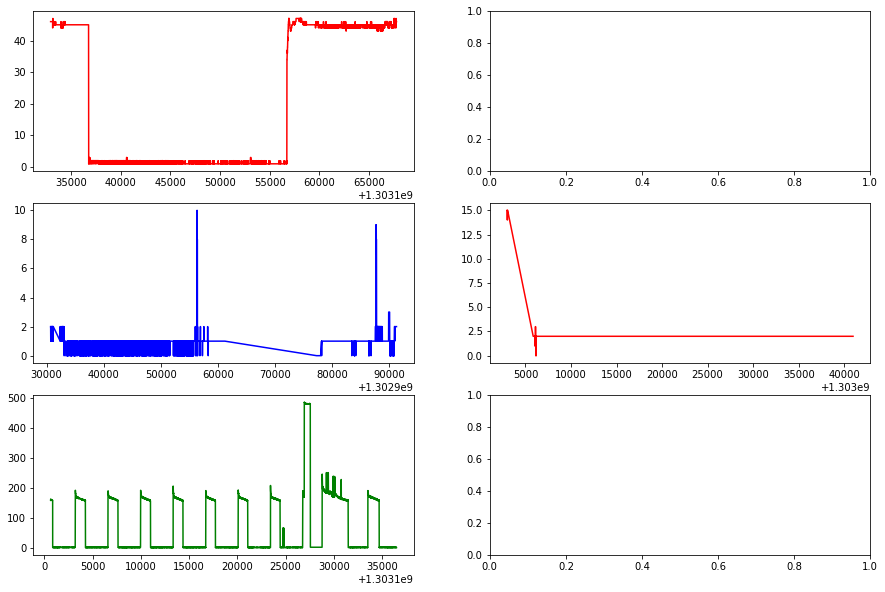

In [97]:
#Graficar los datos Tiempo UTC vs Potencia aparente
fig, ax = plt.subplots(3, 2,figsize=(15, 10))
ax[0, 0].plot(x11[:9000], y11[:9000], 'r') #row=0, col=0
#ax[0, 1].plot(x12, y12, 'g') #row=0, col=1
ax[1, 0].plot(x13[:9000], y13[:9000], 'b') #row=0, col=2
ax[1, 1].plot(x14[:9000], y14[:9000], 'r') #row=1, col=0
ax[2, 0].plot(x15[:9000], y15[:9000], 'g') #row=1, col=1
#ax[2, 1].plot(x16, y16, 'b') #row=1, col=2

### Estadisticas de los datos
Se verificara la estadistica de los datos para tratar de inferir su comportamiento

1. Verificaremos si tenemos datos faltantes en los conjuntos de datos

In [108]:
print(c18h1.info())
print('<<<<<<<<<<<<<')
#print(c18h2.info())
print('<<<<<<<<<<<<<')
print(c18h3.info())
print('<<<<<<<<<<<<<')
print(c18h4.info())
print('<<<<<<<<<<<<<')
print(c18h5.info())
print('<<<<<<<<<<<<<')
#print(c18h6.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 745878 entries, 0 to 745877
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0       745878 non-null  int64  
 1   1       745878 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 11.4 MB
None
<<<<<<<<<<<<<
<<<<<<<<<<<<<
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404107 entries, 0 to 404106
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0       404107 non-null  int64  
 1   1       404107 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 6.2 MB
None
<<<<<<<<<<<<<
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570363 entries, 0 to 570362
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0       570363 non-null  int64  
 1   1       570363 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 8.7 MB
None
<<<<<<

2. Analizaremos las estadisticas de los datos

In [109]:
print(c18h1.describe())
#print(c18h2.describe())
print(c18h3.describe())
print(c18h4.describe())
print(c18h5.describe())
#print(c18h6.describe())

                  0              1
count  7.458780e+05  745878.000000
mean   1.304712e+09      14.944719
std    9.366811e+05      23.197103
min    1.303133e+09       0.000000
25%    1.303864e+09       1.000000
50%    1.304818e+09       1.000000
75%    1.305545e+09      39.000000
max    1.306267e+09      90.000000
                  0              1
count  4.041070e+05  404107.000000
mean   1.304646e+09       0.930895
std    1.340995e+06       0.670733
min    1.302931e+09       0.000000
25%    1.303476e+09       1.000000
50%    1.303892e+09       1.000000
75%    1.306144e+09       1.000000
max    1.306801e+09      44.000000
                  0              1
count  5.703630e+05  570363.000000
mean   1.305132e+09       1.614349
std    1.469944e+06       3.343099
min    1.303003e+09       0.000000
25%    1.303763e+09       0.000000
50%    1.304307e+09       0.000000
75%    1.306605e+09       3.000000
max    1.307148e+09     100.000000
                  0             1
count  8.041700e+04  

3. Se usaran histogramas como ayuda visual para determinar la disperción de la medida de los datos y valores atipicos outliers

(array([4.8355e+04, 3.1048e+04, 1.7900e+02, 0.0000e+00, 8.2400e+02,
        2.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 3.0000e+00, 1.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 3.0000e+00]),
 array([   0. ,  110.2,  220.4,  330.6,  440.8,  551. ,  661.2,  771.4,
         881.6,  991.8, 1102. , 1212.2, 1322.4, 1432.6, 1542.8, 1653. ,
        1763.2, 1873.4, 1983.6, 2093.8, 2204. ]),
 <a list of 20 Patch objects>)

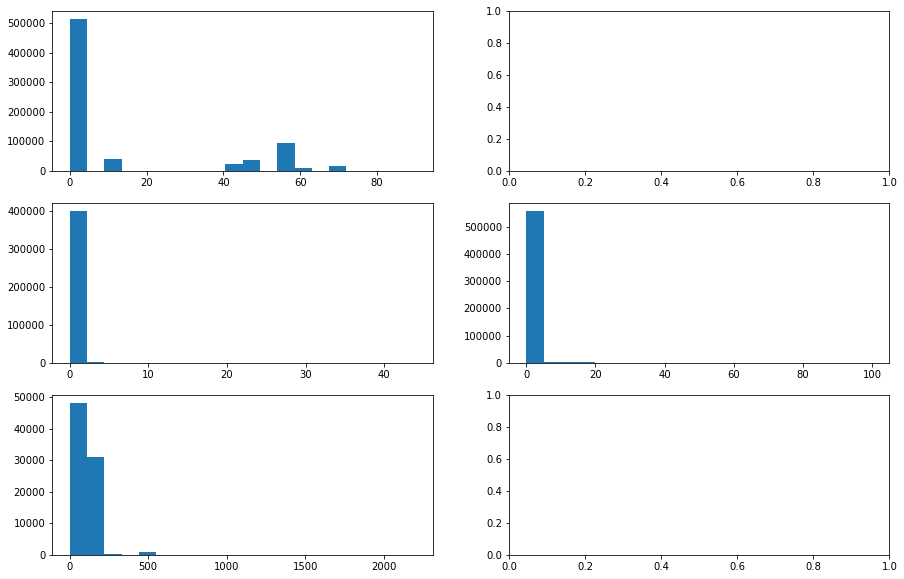

In [110]:
#Graficar los datos Tiempo UTC vs Potencia aparente
fig, ax = plt.subplots(3, 2,figsize=(15, 10))
ax[0, 0].hist(c18h1[1], bins=20) #row=0, col=0
#ax[0, 1].hist(c18h2[1], bins=20) #row=0, col=1
ax[1, 0].hist(c18h3[1], bins=20) #row=0, col=2
ax[1, 1].hist(c18h4[1], bins=20) #row=1, col=0
ax[2, 0].hist(c18h5[1], bins=20) #row=1, col=1
#ax[2, 1].hist(c18h6[1], bins=20) #row=1, col=2

## 19. Lavadora secadora

In [98]:
#Canal 1 Casa 1
c19h1 = pd.read_csv(directory +'\low_freq\house_1\channel_19.dat',sep=r' ',encoding='utf-8',header=None)
#c19h2 = pd.read_csv(directory +'\low_freq\house_2\channel_19.dat',sep=r' ',encoding='utf-8',header=None)
c19h3 = pd.read_csv(directory +'\low_freq\house_3\channel_19.dat',sep=r' ',encoding='utf-8',header=None)
c19h4 = pd.read_csv(directory +'\low_freq\house_4\channel_19.dat',sep=r' ',encoding='utf-8',header=None)
c19h5 = pd.read_csv(directory +'\low_freq\house_5\channel_19.dat',sep=r' ',encoding='utf-8',header=None)
#c19h6 = pd.read_csv(directory +'\low_freq\house_6\channel_19.dat',sep=r' ',encoding='utf-8',header=None)
n_datos1 = c19h1.shape[0]
#n_datos2 = c19h2.shape[0]
n_datos3 = c19h3.shape[0]
n_datos4 = c19h4.shape[0]
n_datos5 = c19h5.shape[0]
#n_datos6 = c19h6.shape[0]
print(n_datos1)
#print(n_datos2)
print(n_datos3)
print(n_datos4)
print(n_datos5)
#print(n_datos6)

745878
404107
570363
80417


Separar los datos para graficarlos

In [99]:
x11 = c19h1[0]
y11 = c19h1[1]

#x12 = c19h2[0]
#y12 = c19h2[1]

x13 = c19h3[0]
y13 = c19h3[1]

x14 = c19h4[0]
y14 = c19h4[1]

x15 = c19h5[0]
y15 = c19h5[1]

#x16 = c19h6[0]
#y16 = c19h6[1]

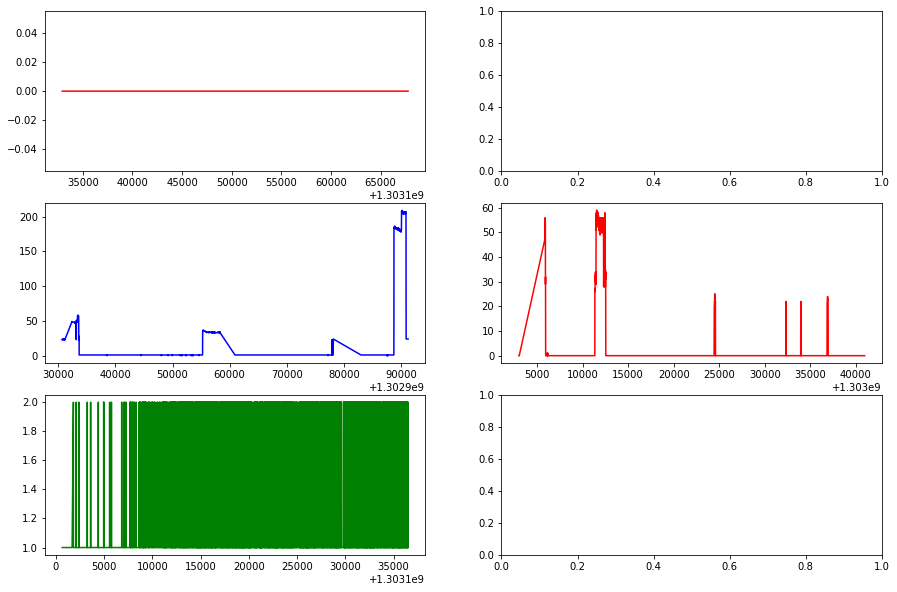

In [101]:
#Graficar los datos Tiempo UTC vs Potencia aparente
fig, ax = plt.subplots(3, 2,figsize=(15, 10))
ax[0, 0].plot(x11[:9000], y11[:9000], 'r') #row=0, col=0
#ax[0, 1].plot(x12, y12, 'g') #row=0, col=1
ax[1, 0].plot(x13[:9000], y13[:9000], 'b') #row=0, col=2
ax[1, 1].plot(x14[:9000], y14[:9000], 'r') #row=1, col=0
ax[2, 0].plot(x15[:9000], y15[:9000], 'g') #row=1, col=1
#ax[2, 1].plot(x16, y16, 'b') #row=1, col=2

### Estadisticas de los datos
Se verificara la estadistica de los datos para tratar de inferir su comportamiento

1. Verificaremos si tenemos datos faltantes en los conjuntos de datos

In [114]:
print(c19h1.info())
print('<<<<<<<<<<<<<')
#print(c19h2.info())
print('<<<<<<<<<<<<<')
print(c19h3.info())
print('<<<<<<<<<<<<<')
print(c19h4.info())
print('<<<<<<<<<<<<<')
print(c19h5.info())
print('<<<<<<<<<<<<<')
#print(c19h6.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 745878 entries, 0 to 745877
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0       745878 non-null  int64  
 1   1       745878 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 11.4 MB
None
<<<<<<<<<<<<<
<<<<<<<<<<<<<
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404107 entries, 0 to 404106
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0       404107 non-null  int64  
 1   1       404107 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 6.2 MB
None
<<<<<<<<<<<<<
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570363 entries, 0 to 570362
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0       570363 non-null  int64  
 1   1       570363 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 8.7 MB
None
<<<<<<

2. Analizaremos las estadisticas de los datos

In [115]:
print(c19h1.describe())
#print(c19h2.describe())
print(c19h3.describe())
print(c19h4.describe())
print(c19h5.describe())
#print(c19h6.describe())

                  0              1
count  7.458780e+05  745878.000000
mean   1.304712e+09       0.000114
std    9.366811e+05       0.036155
min    1.303133e+09       0.000000
25%    1.303864e+09       0.000000
50%    1.304818e+09       0.000000
75%    1.305545e+09       0.000000
max    1.306267e+09      20.000000
                  0              1
count  4.041070e+05  404107.000000
mean   1.304646e+09      15.545724
std    1.340995e+06      42.020862
min    1.302931e+09       0.000000
25%    1.303476e+09       1.000000
50%    1.303892e+09       1.000000
75%    1.306144e+09       1.000000
max    1.306801e+09     226.000000
                  0              1
count  5.703630e+05  570363.000000
mean   1.305132e+09       4.783571
std    1.469944e+06      18.702032
min    1.303003e+09       0.000000
25%    1.303763e+09       0.000000
50%    1.304307e+09       0.000000
75%    1.306605e+09       0.000000
max    1.307148e+09     229.000000
                  0             1
count  8.041700e+04  

3. Se usaran histogramas como ayuda visual para determinar la disperción de la medida de los datos y valores atipicos outliers

(array([68663.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,  1489.,     0.,     0.,
            0.,     0.,  2266.,  7999.]),
 array([  1.  ,   7.05,  13.1 ,  19.15,  25.2 ,  31.25,  37.3 ,  43.35,
         49.4 ,  55.45,  61.5 ,  67.55,  73.6 ,  79.65,  85.7 ,  91.75,
         97.8 , 103.85, 109.9 , 115.95, 122.  ]),
 <a list of 20 Patch objects>)

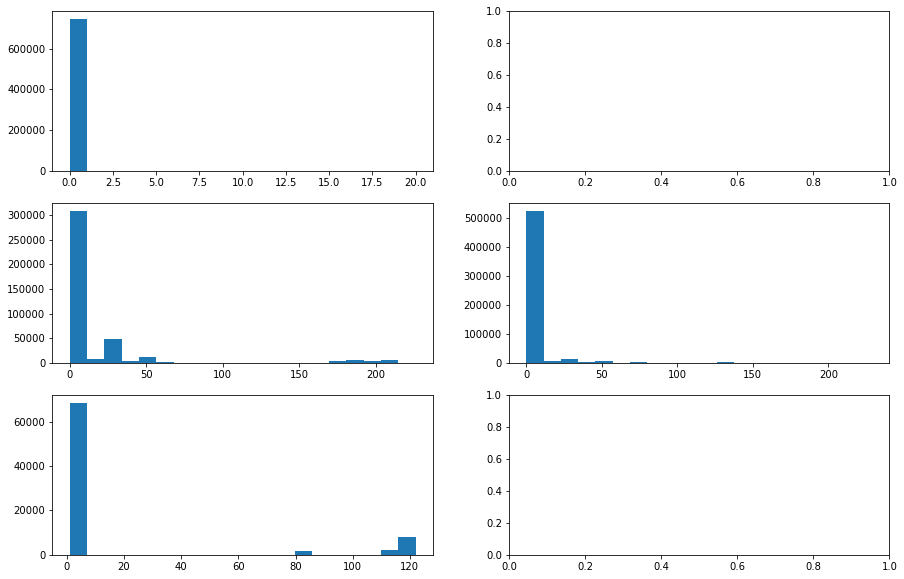

In [116]:
#Graficar los datos Tiempo UTC vs Potencia aparente
fig, ax = plt.subplots(3, 2,figsize=(15, 10))
ax[0, 0].hist(c19h1[1], bins=20) #row=0, col=0
#ax[0, 1].hist(c19h2[1], bins=20) #row=0, col=1
ax[1, 0].hist(c19h3[1], bins=20) #row=0, col=2
ax[1, 1].hist(c19h4[1], bins=20) #row=1, col=0
ax[2, 0].hist(c19h5[1], bins=20) #row=1, col=1
#ax[2, 1].hist(c19h6[1], bins=20) #row=1, col=2

## 20. Lavadora secadora 3

In [102]:
#Canal 1 Casa 1
c20h1 = pd.read_csv(directory +'\low_freq\house_1\channel_20.dat',sep=r' ',encoding='utf-8',header=None)
#c20h2 = pd.read_csv(directory +'\low_freq\house_2\channel_20.dat',sep=r' ',encoding='utf-8',header=None)
c20h3 = pd.read_csv(directory +'\low_freq\house_3\channel_20.dat',sep=r' ',encoding='utf-8',header=None)
c20h4 = pd.read_csv(directory +'\low_freq\house_4\channel_20.dat',sep=r' ',encoding='utf-8',header=None)
c20h5 = pd.read_csv(directory +'\low_freq\house_5\channel_20.dat',sep=r' ',encoding='utf-8',header=None)
#c20h6 = pd.read_csv(directory +'\low_freq\house_6\channel_20.dat',sep=r' ',encoding='utf-8',header=None)
n_datos1 = c20h1.shape[0]
#n_datos2 = c20h2.shape[0]
n_datos3 = c20h3.shape[0]
n_datos4 = c20h4.shape[0]
n_datos5 = c20h5.shape[0]
#n_datos6 = c20h6.shape[0]
print(n_datos1)
#print(n_datos2)
print(n_datos3)
print(n_datos4)
print(n_datos5)
#print(n_datos6)

745878
404107
570363
80417


Separar los datos para graficarlos

In [103]:
x11 = c20h1[0]
y11 = c20h1[1]

#x12 = c20h2[0]
#y12 = c20h2[1]

x13 = c20h3[0]
y13 = c20h3[1]

x14 = c20h4[0]
y14 = c20h4[1]

x15 = c20h5[0]
y15 = c20h5[1]

#x16 = c20h6[0]
#y16 = c20h6[1]

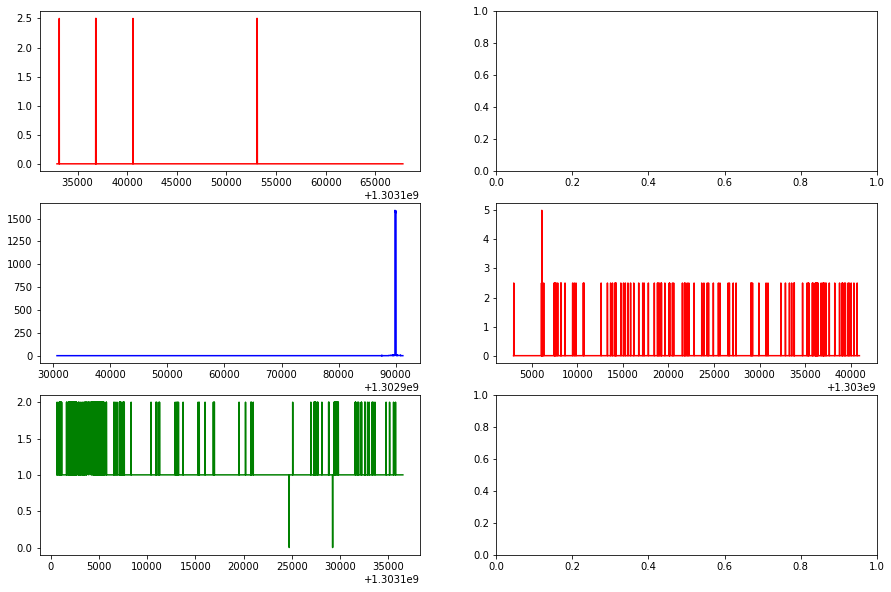

In [104]:
#Graficar los datos Tiempo UTC vs Potencia aparente
fig, ax = plt.subplots(3, 2,figsize=(15, 10))
ax[0, 0].plot(x11[:9000], y11[:9000], 'r') #row=0, col=0
#ax[0, 1].plot(x12, y12, 'g') #row=0, col=1
ax[1, 0].plot(x13[:9000], y13[:9000], 'b') #row=0, col=2
ax[1, 1].plot(x14[:9000], y14[:9000], 'r') #row=1, col=0
ax[2, 0].plot(x15[:9000], y15[:9000], 'g') #row=1, col=1
#ax[2, 1].plot(x16, y16, 'b') #row=1, col=2

### Estadisticas de los datos
Se verificara la estadistica de los datos para tratar de inferir su comportamiento

1. Verificaremos si tenemos datos faltantes en los conjuntos de datos

In [120]:
print(c20h1.info())
print('<<<<<<<<<<<<<')
#print(c20h2.info())
print('<<<<<<<<<<<<<')
print(c20h3.info())
print('<<<<<<<<<<<<<')
print(c20h4.info())
print('<<<<<<<<<<<<<')
print(c20h5.info())
print('<<<<<<<<<<<<<')
#print(c20h6.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 745878 entries, 0 to 745877
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0       745878 non-null  int64  
 1   1       745878 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 11.4 MB
None
<<<<<<<<<<<<<
<<<<<<<<<<<<<
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404107 entries, 0 to 404106
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0       404107 non-null  int64  
 1   1       404107 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 6.2 MB
None
<<<<<<<<<<<<<
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570363 entries, 0 to 570362
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0       570363 non-null  int64  
 1   1       570363 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 8.7 MB
None
<<<<<<

2. Analizaremos las estadisticas de los datos

In [121]:
print(c20h1.describe())
#print(c20h2.describe())
print(c20h3.describe())
print(c20h4.describe())
print(c20h5.describe())
#print(c20h6.describe())

                  0              1
count  7.458780e+05  745878.000000
mean   1.304712e+09      36.195303
std    9.366811e+05     311.307995
min    1.303133e+09       0.000000
25%    1.303864e+09       0.000000
50%    1.304818e+09       0.000000
75%    1.305545e+09       0.000000
max    1.306267e+09    3222.500000
                  0              1
count  4.041070e+05  404107.000000
mean   1.304646e+09      16.978608
std    1.340995e+06     146.311900
min    1.302931e+09       0.000000
25%    1.303476e+09       0.000000
50%    1.303892e+09       0.000000
75%    1.306144e+09       0.000000
max    1.306801e+09    1670.000000
                  0              1
count  5.703630e+05  570363.000000
mean   1.305132e+09       0.005177
std    1.469944e+06       0.200335
min    1.303003e+09       0.000000
25%    1.303763e+09       0.000000
50%    1.304307e+09       0.000000
75%    1.306605e+09       0.000000
max    1.307148e+09      95.000000
                  0             1
count  8.041700e+04  

3. Se usaran histogramas como ayuda visual para determinar la disperción de la medida de los datos y valores atipicos outliers

(array([7.9631e+04, 6.0000e+00, 2.1700e+02, 1.2000e+01, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 3.6700e+02, 1.8300e+02, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([   0.  ,  158.85,  317.7 ,  476.55,  635.4 ,  794.25,  953.1 ,
        1111.95, 1270.8 , 1429.65, 1588.5 , 1747.35, 1906.2 , 2065.05,
        2223.9 , 2382.75, 2541.6 , 2700.45, 2859.3 , 3018.15, 3177.  ]),
 <a list of 20 Patch objects>)

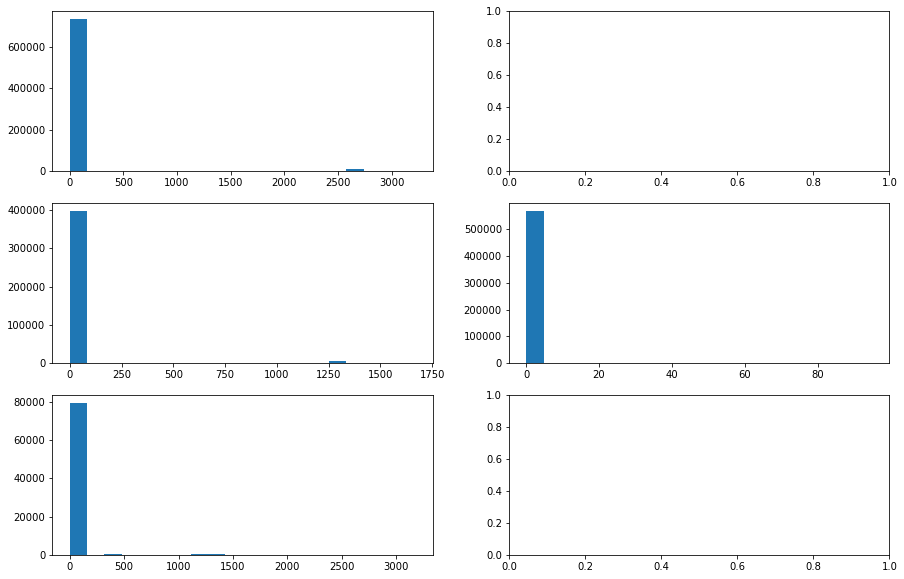

In [122]:
#Graficar los datos Tiempo UTC vs Potencia aparente
fig, ax = plt.subplots(3, 2,figsize=(15, 10))
ax[0, 0].hist(c20h1[1], bins=20) #row=0, col=0
#ax[0, 1].hist(c20h2[1], bins=20) #row=0, col=1
ax[1, 0].hist(c20h3[1], bins=20) #row=0, col=2
ax[1, 1].hist(c20h4[1], bins=20) #row=1, col=0
ax[2, 0].hist(c20h5[1], bins=20) #row=1, col=1
#ax[2, 1].hist(c20h6[1], bins=20) #row=1, col=2